# Project - Personal Loan Campaign
---

## Context:

- AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

- A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

## Objective:

- The pbjective of this analysis is for AllLife bank to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

- Following are the Key questions to be solved: 

    1. To predict whether a liability customer will buy a personal loan or not.
    2. Which variables are most significant.
    3. Which segment of customers should be targeted more.


## Data Information

The records contain the Customer personal information and their banking account information & usage pattern. The detailed data dictionary is given below:

**Data Dictionary**

* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)


---

## Importing the necessary packages:
---

In [2]:
# Importing the Python Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Importing libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Used for Ignore warnings. When we generate the output, then we can use this ignore warning
import warnings

warnings.filterwarnings("ignore")

# this will help in making the Python code more structured automatically (good coding practice)
!pip install nb-black
%reload_ext nb_black

# Command to tell Python to actually display the graphs
%matplotlib inline

# let's start by installing plotly
!pip install plotly

# importing plotly
import plotly.express as px


# Command to hide the 'already satisfied' warnining from displaying
%pip install keras | grep -v 'already satisfied'

# Constant for making bold text
boldText = "\033[1m"

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 500)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pd.set_option("mode.chained_assignment", None)

# To build model for prediction
from sklearn.linear_model import LogisticRegression

# To get diferent metric scores
# To tune different models
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

Note: you may need to restart the kernel to use updated packages.


<IPython.core.display.Javascript object>

In [3]:
# Loading Used Cars Dataset
df = pd.read_csv("../Dataset/Loan_Modelling.csv")

# same random results every time
np.random.seed(1)
df.sample(n=10)

# To copy the data to another object
loanData = df.copy()

<IPython.core.display.Javascript object>

---

## Unwrapping the Customer Information:
---

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<IPython.core.display.Javascript object>

In [5]:
# Command to understand the total number of data collected
print(
    f"- There are {df.shape[0]} row samples and {df.shape[1]} attributes of the customer information collected in this dataset."
)

- There are 5000 row samples and 14 attributes of the customer information collected in this dataset.


<IPython.core.display.Javascript object>

In [6]:
df.head(5)  # Displaying the fist 10 rows of the Dataset

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

<IPython.core.display.Javascript object>

In [7]:
df.tail(5)  # Displaying the last 10 rows of the Dataset

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

<IPython.core.display.Javascript object>

---

## Data Preprocessing
---

#### Dropping the Customer ID Column

In [8]:
# Dropping the 'ID' columns since its not required
df.drop(["ID"], axis=1, inplace=True)
print("Dropped the 'ID' attribute since its not required")

Dropped the 'ID' attribute since its not required


<IPython.core.display.Javascript object>

#### Fixing the Experience data

In [9]:
df[(df["Experience"] < 0)].head(5)

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
89    25          -1     113    94303       4   2.30          3         0   
226   24          -1      39    94085       2   1.70          2         0   
315   24          -2      51    90630       3   0.30          3         0   
451   28          -2      48    94132       2   1.75          3        89   
524   24          -1      75    93014       4   0.20          1         0   

     Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
89               0                   0           0       0           1  
226              0                   0           0       0           0  
315              0                   0           0       1           0  
451              0                   0           0       1           0  
524              0                   0           0       1           0

<IPython.core.display.Javascript object>

In [10]:
print(
    f"- There are {len(df[(df['Experience'] < 0)])} rows with Experience value less than Zero "
)

- There are 52 rows with Experience value less than Zero 


<IPython.core.display.Javascript object>

In [11]:
# Assigning the experience value to 0 for rows that have value less than 0
df.loc[df["Experience"] < 0, "Experience"] = 0

<IPython.core.display.Javascript object>

In [12]:
print(
    f"- There are {len(df[(df['Experience'] < 0)])} rows with Experience value less than Zero "
)

- There are 0 rows with Experience value less than Zero 


<IPython.core.display.Javascript object>

#### Converting the ZipCode to Ranges so that we can convert it to a Category type

In [13]:
# Defining bins for splitting the zipcide to groups and creating a new column
bins = [
    90000,
    90500,
    91000,
    91500,
    92000,
    92500,
    93000,
    93500,
    94000,
    94500,
    95000,
    95500,
    96000,
    96500,
    97000,
]
labels = [
    "< 90500",
    "< 91000",
    "< 91500",
    "< 92000",
    "< 92500",
    "< 93000",
    "< 93500",
    "< 94000",
    "< 94500",
    "< 95000",
    "< 95500",
    "< 96000",
    "< 96500",
    "< 97000",
]
df["ZIPCodeGroup"] = pd.cut(df["ZIPCode"], bins=bins, labels=labels, right=False)
df["ZIPCodeGroup"] = df["ZIPCodeGroup"].astype("category")

# Dropping the 'ZIPCode' columns since the ZipCode will not be a primary reason for applying a Personal loan
df.drop(["ZIPCode"], axis=1, inplace=True)
print("Dropped the 'ZIPCode' attribute since its not required")

Dropped the 'ZIPCode' attribute since its not required


<IPython.core.display.Javascript object>

## Checking the data types of the columns
---

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   Family              5000 non-null   int64   
 4   CCAvg               5000 non-null   float64 
 5   Education           5000 non-null   int64   
 6   Mortgage            5000 non-null   int64   
 7   Personal_Loan       5000 non-null   int64   
 8   Securities_Account  5000 non-null   int64   
 9   CD_Account          5000 non-null   int64   
 10  Online              5000 non-null   int64   
 11  CreditCard          5000 non-null   int64   
 12  ZIPCodeGroup        5000 non-null   category
dtypes: category(1), float64(1), int64(11)
memory usage: 474.4 KB


<IPython.core.display.Javascript object>

* The dataset has primarily all numbers. Some of the column attributes are meant to be Category types

### Fixing the data types

In [15]:
# Converting columns that has Categorical variables to a Category type.
df["Education"] = df["Education"].astype("category")
df["Personal_Loan"] = df["Personal_Loan"].astype("category")
df["Securities_Account"] = df["Securities_Account"].astype("category")
df["CD_Account"] = df["CD_Account"].astype("category")
df["Online"] = df["Online"].astype("category")
df["CreditCard"] = df["CreditCard"].astype("category")
df["Family"] = df["Family"].astype("category")


<IPython.core.display.Javascript object>

* The columns with Categorical values have been converted to Category type

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   Family              5000 non-null   category
 4   CCAvg               5000 non-null   float64 
 5   Education           5000 non-null   category
 6   Mortgage            5000 non-null   int64   
 7   Personal_Loan       5000 non-null   category
 8   Securities_Account  5000 non-null   category
 9   CD_Account          5000 non-null   category
 10  Online              5000 non-null   category
 11  CreditCard          5000 non-null   category
 12  ZIPCodeGroup        5000 non-null   category
dtypes: category(8), float64(1), int64(4)
memory usage: 236.1 KB


<IPython.core.display.Javascript object>

* There are 4 Int Types, 1 Float Type & 8 Category Types in the attributes.

In [18]:
category_columnNames = df.describe(include=["category"]).columns
category_columnNames

Index(['Family', 'Education', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard', 'ZIPCodeGroup'],
      dtype='object')

<IPython.core.display.Javascript object>

---

## Performing the Sanity Check
---

In [17]:
df.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
ZIPCodeGroup          0
dtype: int64

<IPython.core.display.Javascript object>

* There are no missing values in the data.

In [18]:
# Checking for duplicated rows in the dataset
duplicateSum = df.duplicated().sum()
if duplicateSum > 0:
    print(f"- There are {str(duplicateSum)} duplicated row(s) in the dataset")
    # Removing the duplicated rows in the dataset
    df.drop_duplicates(inplace=True)
    print(
        f"- There are {str(df.duplicated().sum())} duplicated row(s) in the dataset post cleaning"
    )
    df.duplicated().sum()
    # resetting the index of data frame since some rows will be removed
    df.reset_index(drop=True, inplace=True)
else:
    print("- There are no duplicated row(s) in the dataset")

- There are 1 duplicated row(s) in the dataset
- There are 0 duplicated row(s) in the dataset post cleaning


<IPython.core.display.Javascript object>

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 4999 non-null   int64   
 1   Experience          4999 non-null   int64   
 2   Income              4999 non-null   int64   
 3   Family              4999 non-null   category
 4   CCAvg               4999 non-null   float64 
 5   Education           4999 non-null   category
 6   Mortgage            4999 non-null   int64   
 7   Personal_Loan       4999 non-null   category
 8   Securities_Account  4999 non-null   category
 9   CD_Account          4999 non-null   category
 10  Online              4999 non-null   category
 11  CreditCard          4999 non-null   category
 12  ZIPCodeGroup        4999 non-null   category
dtypes: category(8), float64(1), int64(4)
memory usage: 236.0 KB


<IPython.core.display.Javascript object>

In [20]:
df.describe(include="all").T

count unique      top    freq       mean         std  \
Age                 4999.0    NaN      NaN     NaN  45.340268   11.463551   
Experience          4999.0    NaN      NaN     NaN  20.121624   11.440733   
Income              4999.0    NaN      NaN     NaN  73.772955    46.03825   
Family              4999.0    4.0      1.0  1472.0        NaN         NaN   
CCAvg               4999.0    NaN      NaN     NaN   1.937886     1.74783   
Education           4999.0    3.0      1.0  2096.0        NaN         NaN   
Mortgage            4999.0    NaN      NaN     NaN  56.510102  101.720837   
Personal_Loan       4999.0    2.0      0.0  4519.0        NaN         NaN   
Securities_Account  4999.0    2.0      0.0  4477.0        NaN         NaN   
CD_Account          4999.0    2.0      0.0  4697.0        NaN         NaN   
Online              4999.0    2.0      1.0  2983.0        NaN         NaN   
CreditCard          4999.0    2.0      0.0  3529.0        NaN         NaN   
ZIPCodeGroup          4999     14  < 94500     776        NaN         NaN   

                     min   25%   50%    75%    max  
Age                 23.0  35.0  45.0   55.0   67.0  
Experience           0.0  10.0  20.0   30.0   43.0  
Income               8.0  39.0  64.0   98.0  224.0  
Family               NaN   NaN   NaN    NaN    NaN  
CCAvg                0.0   0.7   1.5    2.5   10.0  
Education            NaN   NaN   NaN    NaN    NaN  
Mortgage             0.0   0.0   0.0  101.0  635.0  
Personal_Loan        NaN   NaN   NaN    NaN    NaN  
Securities_Account   NaN   NaN   NaN    NaN    NaN  
CD_Account           NaN   NaN   NaN    NaN    NaN  
Online               NaN   NaN   NaN    NaN    NaN  
CreditCard           NaN   NaN   NaN    NaN    NaN  
ZIPCodeGroup         NaN   NaN   NaN    NaN    NaN

<IPython.core.display.Javascript object>

<a id='dataanalysis1'></a>
### <a id='dataanalysis2'>Summary of Data Analysis</a>

**Data Structure:**

* Dependent variable is the Personal_Loan which is of categorical data type.
* There are 5000 row samples and 14 attributes of the customer information collected in this dataset.
* Almost all columns are of int64(13) & one float64(1) column

**Data Cleaning:**

* ID attribute is not required and the column was dropped
* There are no missing values in the dataset
* There was 1 duplicate row in the dataset which was removed. Total rows is 4999
* Experience column had negative values and this was marked to 0
* ZipCode is not a discrete/continuous variable and it was converted to a range and column was changed to Category type
* Some of the integer values are of Cateogorial types and was converted to Category type - 'Family', 'Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCodeGroup'

**Data Description:**
* 50% of the customer population does not have Mortgage
* There are 4 types of Family members list with type 1 (Single) members as the highest
* There are 3 types of Educations with type 1 (Graduates) as the highest
* The Personal_Loan, Securities_Account, CD_Account, Online & CreditCard has only two values - 1 & 0
* Theer are more customers within the zipcode range of '<94500' and there are 14 ranges of zipcodes


---

## EDA Analysis - Analyzing respective attributes to understand the data pattern

---

In [21]:
# Summary of data
df.describe(include="all").T

count unique      top    freq       mean         std  \
Age                 4999.0    NaN      NaN     NaN  45.340268   11.463551   
Experience          4999.0    NaN      NaN     NaN  20.121624   11.440733   
Income              4999.0    NaN      NaN     NaN  73.772955    46.03825   
Family              4999.0    4.0      1.0  1472.0        NaN         NaN   
CCAvg               4999.0    NaN      NaN     NaN   1.937886     1.74783   
Education           4999.0    3.0      1.0  2096.0        NaN         NaN   
Mortgage            4999.0    NaN      NaN     NaN  56.510102  101.720837   
Personal_Loan       4999.0    2.0      0.0  4519.0        NaN         NaN   
Securities_Account  4999.0    2.0      0.0  4477.0        NaN         NaN   
CD_Account          4999.0    2.0      0.0  4697.0        NaN         NaN   
Online              4999.0    2.0      1.0  2983.0        NaN         NaN   
CreditCard          4999.0    2.0      0.0  3529.0        NaN         NaN   
ZIPCodeGroup          4999     14  < 94500     776        NaN         NaN   

                     min   25%   50%    75%    max  
Age                 23.0  35.0  45.0   55.0   67.0  
Experience           0.0  10.0  20.0   30.0   43.0  
Income               8.0  39.0  64.0   98.0  224.0  
Family               NaN   NaN   NaN    NaN    NaN  
CCAvg                0.0   0.7   1.5    2.5   10.0  
Education            NaN   NaN   NaN    NaN    NaN  
Mortgage             0.0   0.0   0.0  101.0  635.0  
Personal_Loan        NaN   NaN   NaN    NaN    NaN  
Securities_Account   NaN   NaN   NaN    NaN    NaN  
CD_Account           NaN   NaN   NaN    NaN    NaN  
Online               NaN   NaN   NaN    NaN    NaN  
CreditCard           NaN   NaN   NaN    NaN    NaN  
ZIPCodeGroup         NaN   NaN   NaN    NaN    NaN

<IPython.core.display.Javascript object>

<a id='inCategory1'></a>
### <a id='inCategory2'>Insights from Categorical Data</a>

In [22]:
# printing the number of occurrences of each unique value in each categorical column
num_to_display = 15
for column in category_columnNames:
    val_counts = df[column].value_counts(
        dropna=False
    )  # Kept dropNA to False to see the NA value count as well
    val_countsP = df[column].value_counts(dropna=False, normalize=True)
    print("Unique values in", column, "are :")
    print(val_counts[:num_to_display])
    print(val_countsP[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f"Only displaying first {num_to_display} of {len(val_counts)} values.")
    print("-" * 50)

Unique values in Family are :
1    1472
2    1296
4    1221
3    1010
Name: Family, dtype: int64
1    0.294459
2    0.259252
4    0.244249
3    0.202040
Name: Family, dtype: float64
--------------------------------------------------
Unique values in Education are :
1    2096
3    1501
2    1402
Name: Education, dtype: int64
1    0.419284
3    0.300260
2    0.280456
Name: Education, dtype: float64
--------------------------------------------------
Unique values in Personal_Loan are :
0    4519
1     480
Name: Personal_Loan, dtype: int64
0    0.903981
1    0.096019
Name: Personal_Loan, dtype: float64
--------------------------------------------------
Unique values in Securities_Account are :
0    4477
1     522
Name: Securities_Account, dtype: int64
0    0.895579
1    0.104421
Name: Securities_Account, dtype: float64
--------------------------------------------------
Unique values in CD_Account are :
0    4697
1     302
Name: CD_Account, dtype: int64
0    0.939588
1    0.060412
Name: CD_

<IPython.core.display.Javascript object>

* Family Size (Members 1, 2, 3, 4) - 29% of them are single, 26% are 2 member size, 24% are 4 members & 20% are 3 member sizes
* Education Level ( 1: Undergrad; 2: Graduate;3: Advanced/Professional) - 42% of the customers are Undergrad, 30% of them being Advanced/Professional and remaining graduates
* 16% of the Customers are from the zipocde in the range of '< 94500'
- Assuming the values for the positive condition == 1: 
    * Personal Loan: As reported, only 10% of the customers accepted for loan and remaining 90% custumers are potentials to be approached by marketing team 
    * Securities Account: 10% of the customers have security account with the bank
    * CD Account: Only 6% of the customers have certificate of deposit (CD) account with the bank
    * Online Banking: Almost 60% of the users use online Internet banking facilities
    * Credit Card: 30% of the Customers use credit card issued by other banks exlcuding All life Bank

<a id='inNumber1'></a>
### <a id='inNumber2'>Insights from Numerical Data</a>

In [23]:
# Summary of numeric data
df.describe().T

count       mean         std   min   25%   50%    75%    max
Age         4999.0  45.340268   11.463551  23.0  35.0  45.0   55.0   67.0
Experience  4999.0  20.121624   11.440733   0.0  10.0  20.0   30.0   43.0
Income      4999.0  73.772955   46.038250   8.0  39.0  64.0   98.0  224.0
CCAvg       4999.0   1.937886    1.747830   0.0   0.7   1.5    2.5   10.0
Mortgage    4999.0  56.510102  101.720837   0.0   0.0   0.0  101.0  635.0

<IPython.core.display.Javascript object>

* Age: The average age of the Customers is 45 with customers starting from age of 23 to max of 67 years old. The Mean & Median are almost the same
* Experience: On an average, the customers have 20 years of professional experience. The Mean & Median are almost the same
* Annual Income: Average income is 64K, with annual income starting from 8K to 224K. The minimum annual income starts from 8K to max of 224K with mean larger than the Median value
* CC Average: Average spending on credit cards per month is around 2K with min of zero spending to max of 10K. The Mean & Median are almost close to each other
* Mortgage: Average value of house mortgage is around 56K. Almost 50% of the customers have zero mortgae value with a max value of 635K

---

<a id='UnivariateAnalysis1'></a>
### <a id='UnivariateAnalysis2'>Univariate Analysis</a>

#### Analyzing the count and percentage of Categorical attributes using a bar chart

In [24]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None, hueCol=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 7))

    plt.xticks(rotation=90, fontsize=15)

    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        hue=hueCol,
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )
        # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [25]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True,).sort_values(
        by=sorter, ascending=False
    )
    print("-" * 30, " Volume ", "-" * 30)
    print(tab1)

    tab1 = pd.crosstab(
        data[predictor], data[target], margins=True, normalize="index"
    ).sort_values(by=sorter, ascending=False)
    print("-" * 30, " Percentage % ", "-" * 30)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

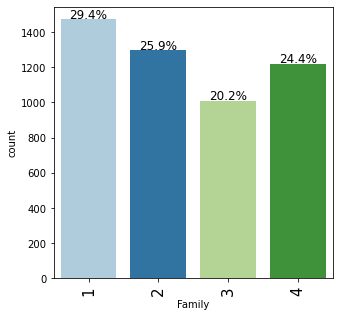

<Figure size 432x288 with 0 Axes>

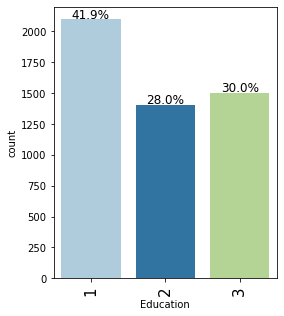

<Figure size 432x288 with 0 Axes>

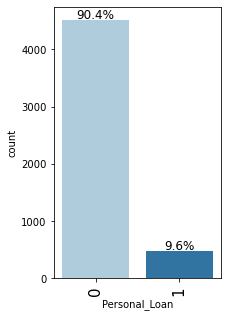

<Figure size 432x288 with 0 Axes>

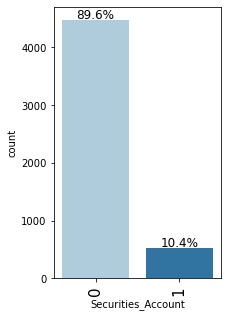

<Figure size 432x288 with 0 Axes>

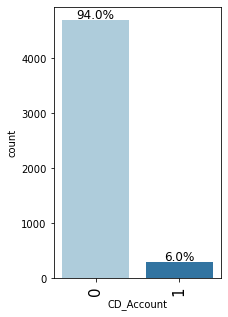

<Figure size 432x288 with 0 Axes>

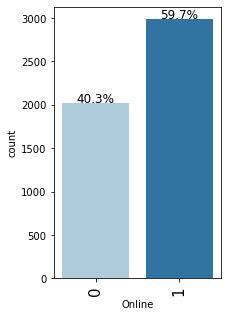

<Figure size 432x288 with 0 Axes>

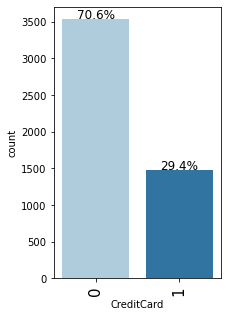

<Figure size 432x288 with 0 Axes>

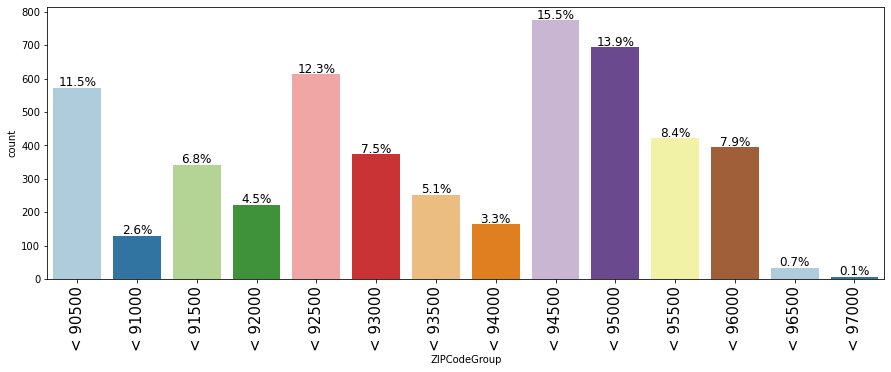

<Figure size 432x288 with 0 Axes>

<IPython.core.display.Javascript object>

In [26]:
# Creating a function to display the values of the attributes against the chart
for i, cols in zip(range(len(category_columnNames)), category_columnNames):
    labeled_barplot(df, cols, perc=True)
    plt.tight_layout()


**Overall observations of the Categorical attributes**

* 29.4% of the Customers are single members followed by 2 family members , then 4 members & then 3 member families
* Education: 42% of the customer are Undergrad (Type 1), 30% are Advanced/Professional (Type 3) & 28% are Graduates (Type 2)
* Personal Loan: As reported, only ~10% of the customers accepted for loan and remaining 90% custumers are potentials to be approached by marketing team 
* Securities Account: 90% of the customers do not have security account with the bank
* CD Account: 94% of the customers do not have certificate of deposit (CD) account with the bank
* Online Banking: Almost 60% of the users use online Internet banking facilities
* Credit Card: 30% of the Customers use credit card issued by other backs exlcuding All life Bank
* Zip Code group of "< 94500" has the highest volume of customers - 15.5%

#### Analyzing the Numerical attributes using Histogram and Box Plots

In [27]:
# Creating a common function to draw a Boxplot & a Histogram for each of the analysis
def histogram_boxplot(data, feature, figsize=(15, 7), kde=True, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots

    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column

    if bins:
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
        )
    else:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)  # For histogram

    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram

    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [28]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

<IPython.core.display.Javascript object>

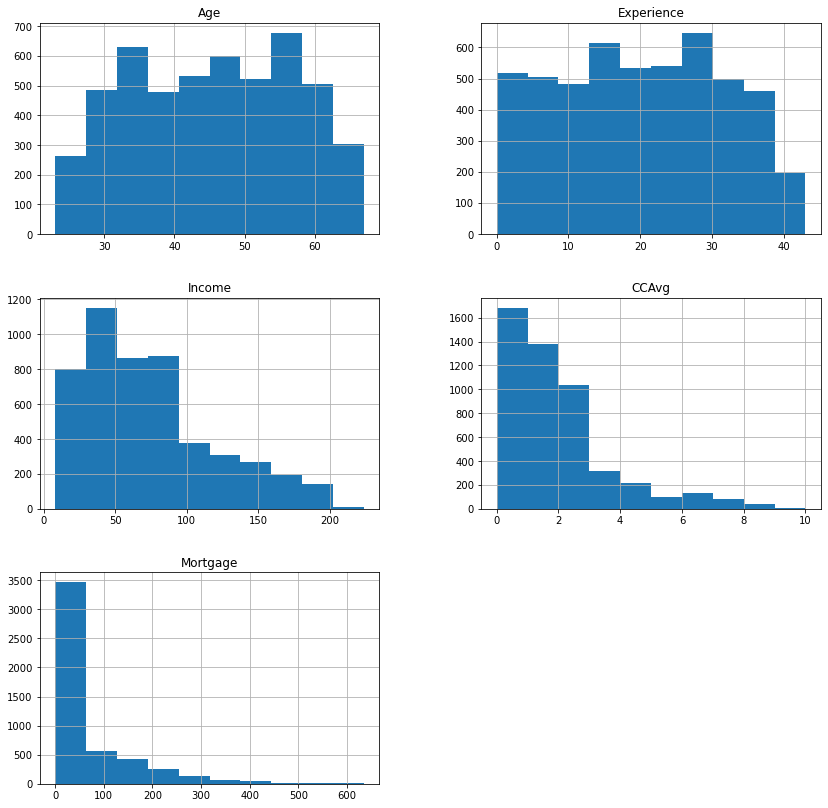

<IPython.core.display.Javascript object>

In [29]:
# creating histograms
df.hist(figsize=(14, 14))
plt.show()

#### Aalyzing the Age of the Customers

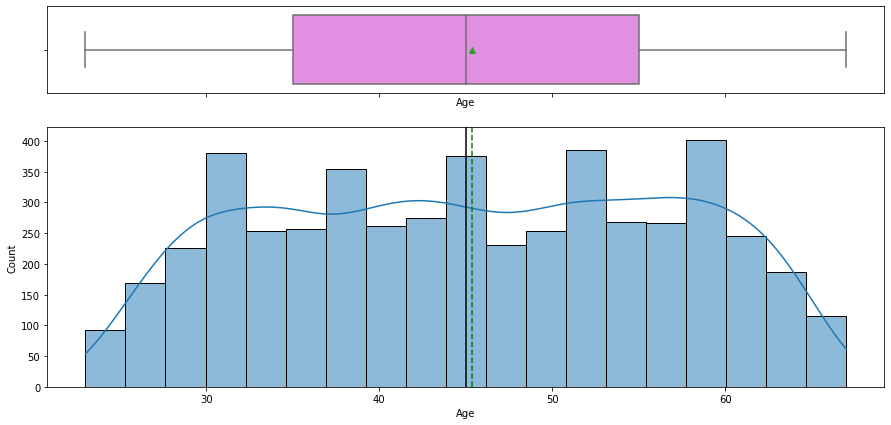

<IPython.core.display.Javascript object>

In [30]:
histogram_boxplot(df, "Age")

**Observations:**
* Age has a normal distribution with most of the Customers around the age of 30 - 60 
* The Mean & Median are almost same
* There are no outliers identified in this attribute

#### Analyzing the Experience of the Customers

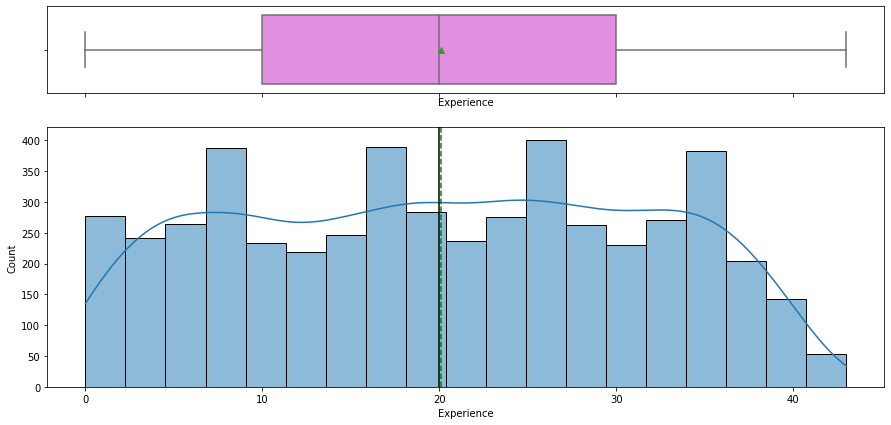

<IPython.core.display.Javascript object>

In [31]:
histogram_boxplot(df, "Experience")

**Observations:**
* It has a normal distribution with no outliers identified
* Mean & Median are almost the same
* Customers are having around 9 years to 35 years of work experience

#### Analyzing the Income of the Customers

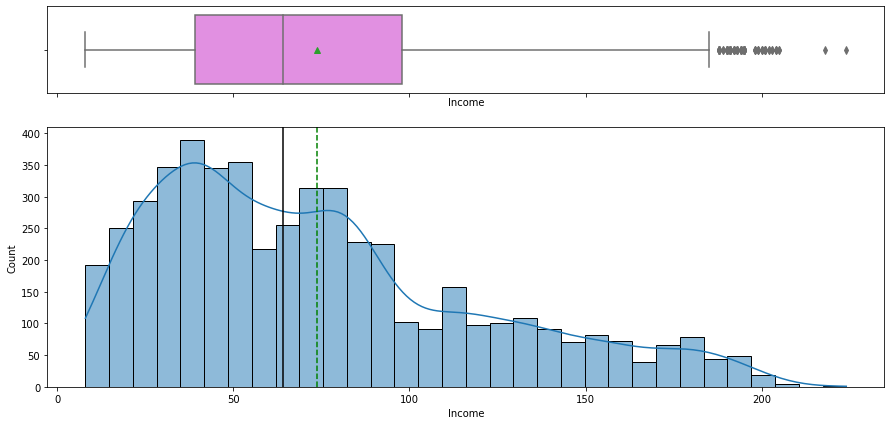

<IPython.core.display.Javascript object>

In [32]:
histogram_boxplot(df, "Income")

**Observations:**
* Distribution is positively skewed with few outliers that needs to be addressed
* Majority of the Customers are within the range of 80K income
* Median is less than the Mean value
* Considering we have significant high income users who have not availed loans, we will not be treating the outliers

#### Analyzing the number of CCAvg value of the customers

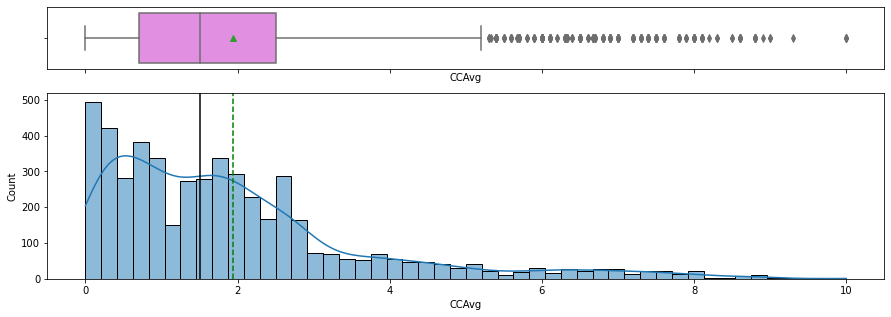

<IPython.core.display.Javascript object>

In [33]:
histogram_boxplot(df, "CCAvg", (15, 5))

**Observations:**
* The distribution is positively skewed with Median value less than the Mean value
* Outliers are found on the higher side but we will be retaining the outliers since they look normal for the high income users

#### Analyzing the Mortgage value of the Customers

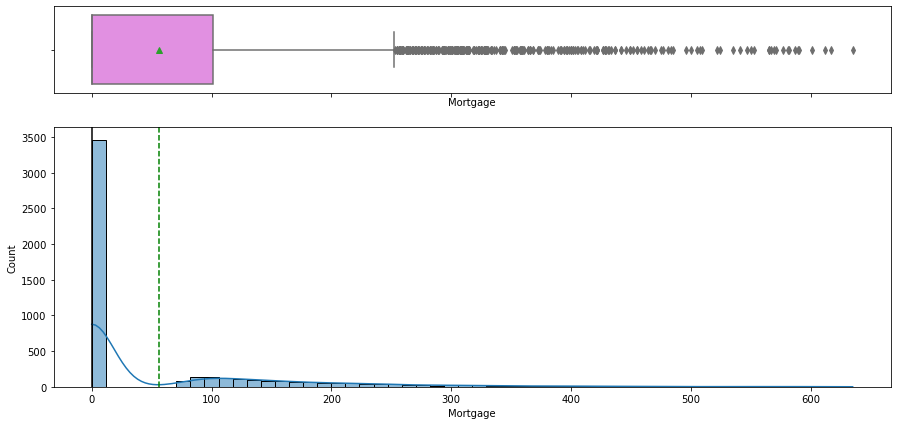

<IPython.core.display.Javascript object>

In [34]:
histogram_boxplot(df, "Mortgage")

**Observations:**
* The distribution seems to be highly skewed with lot of outliers, but considering that most of users have not availed the Mortgae, we will treat this as normal.

<a id='BivariateAnalysis1'></a>
### <a id='BivariateAnalysis2'>Bivariate Analysis - Visualise Numerical variables association with each other & its Correlation</a>
---

<AxesSubplot:>

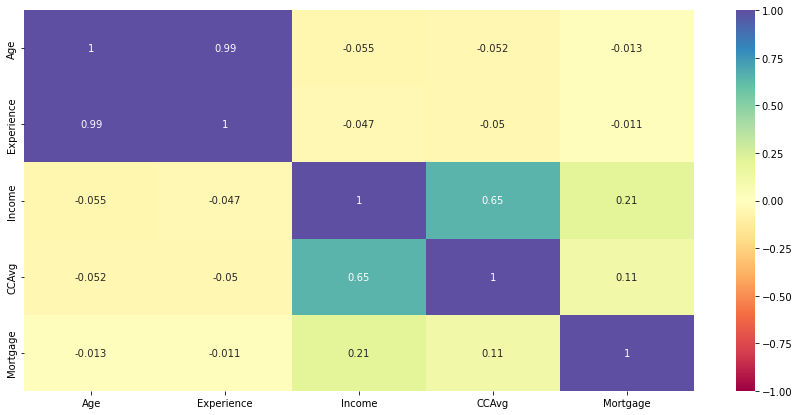

<IPython.core.display.Javascript object>

In [35]:
# Plotting Heatmap by creating a 2-D Matrix with correlation plots
correlation = df.corr()
plt.figure(figsize=(15, 7))
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True, cmap="Spectral")

**Observations:**
* Age & Experience are highly corelated which is true. Experience increases with Age. Other than Experience, Age has a negative correlation with other attributes
* Income and CC Average are correlated which is true. More income users will spend more using credit cards
* Income and Mortgage are correlated. As income increases, the mortgage value can increase
* Income has not much correlation with Experience & Age. We can see low income users for high experience and vice versa
* The remaining attributes doesnt seem to have much correlation

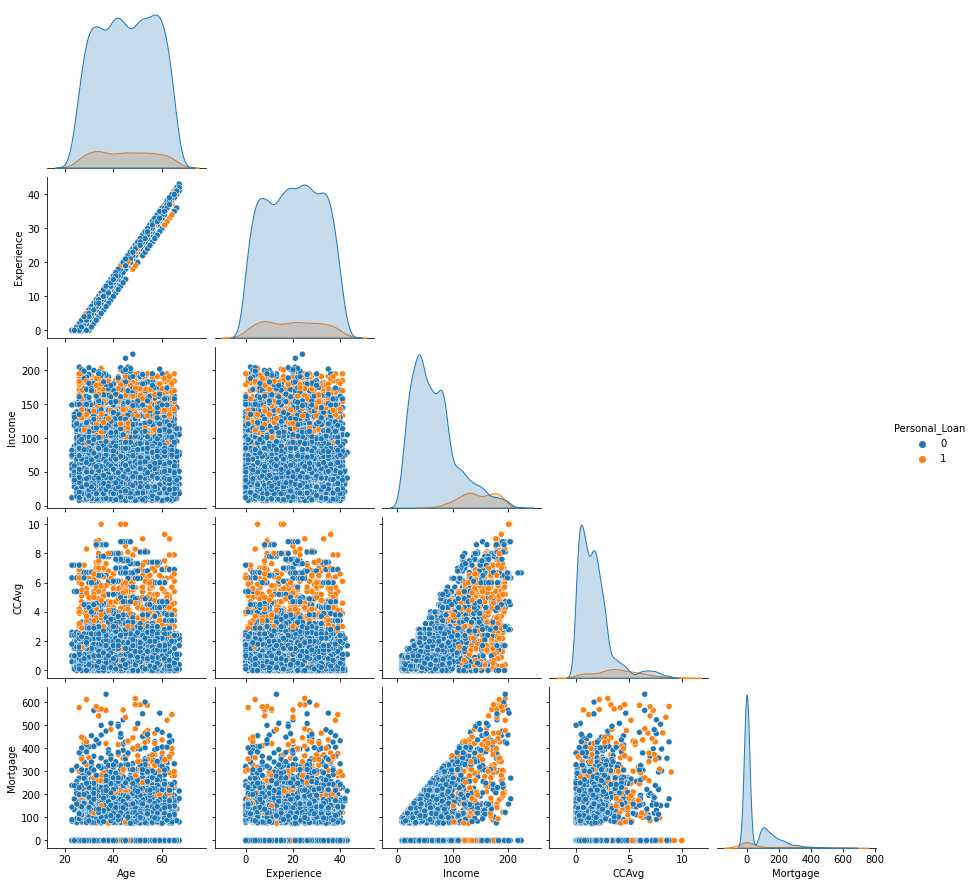

<IPython.core.display.Javascript object>

In [36]:
sns.pairplot(df, corner=True, hue="Personal_Loan")

**Observations:**
* Age & Experience are highly corelated, with traces of customers who have availed loan for higher experience 
* Income seems to be the driving factor for Personal loans and high income users have pretty much taken loans when compared with low income customers
* Income and CC Average are correlated which is expcted. More income users will spend more using credit cards
* Income and Mortgage are correlated which is expected. More income users will apply for Mortgage
* High income & High Experience users seem to have availed personal loan
* Large family members with high income seems to have availed personal loans
* Customers with Credit Card average seems to have availed personal loans

#### Analyzing the Categorial attributes with Personal Loan

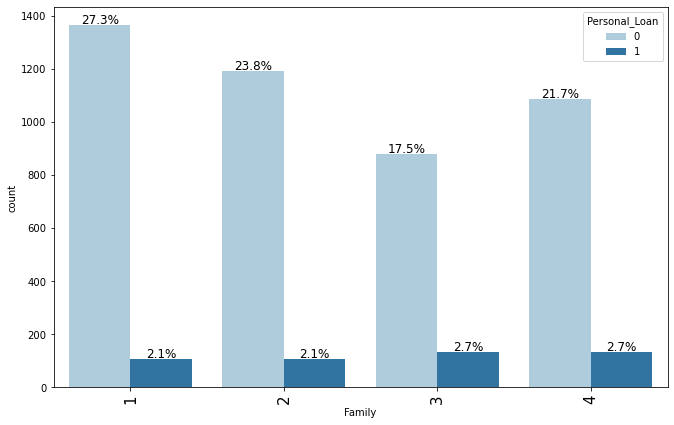

<Figure size 432x288 with 0 Axes>

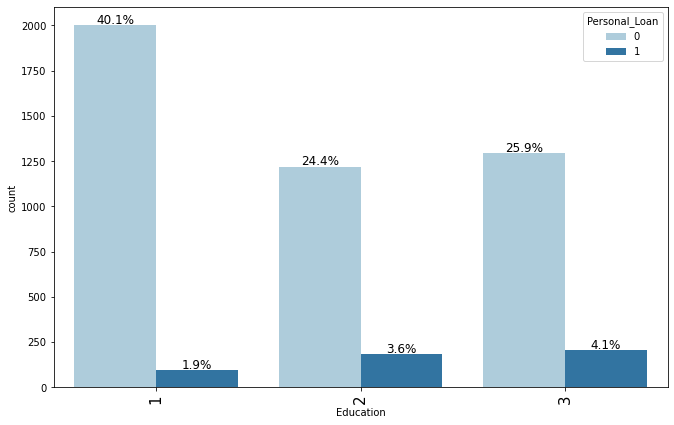

<Figure size 432x288 with 0 Axes>

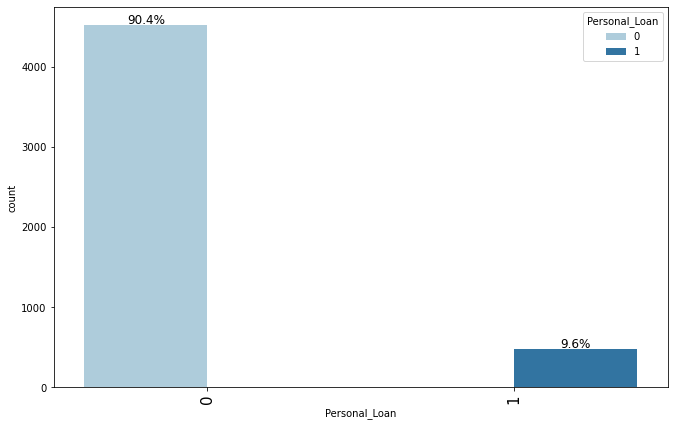

<Figure size 432x288 with 0 Axes>

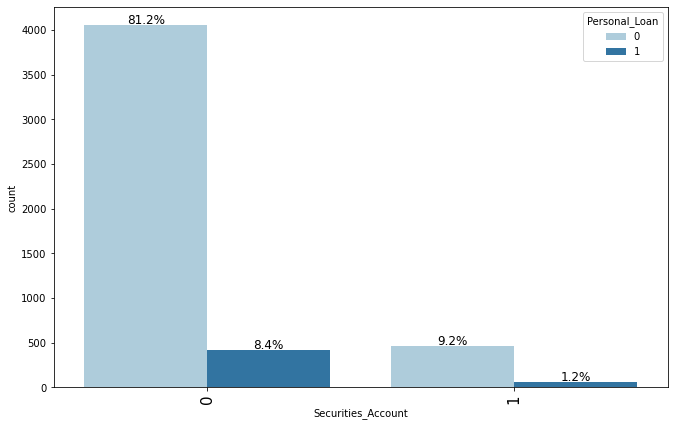

<Figure size 432x288 with 0 Axes>

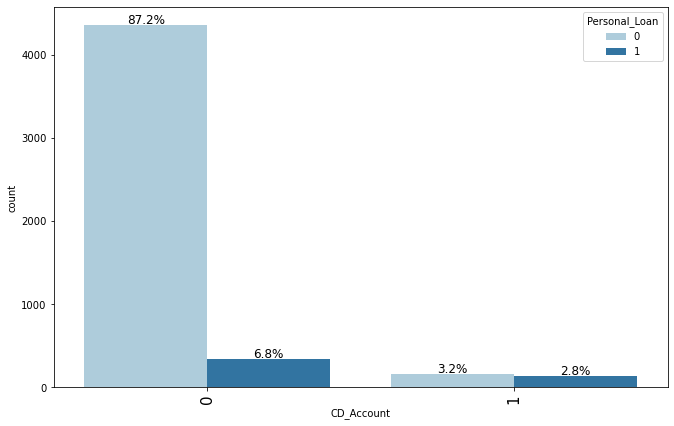

<Figure size 432x288 with 0 Axes>

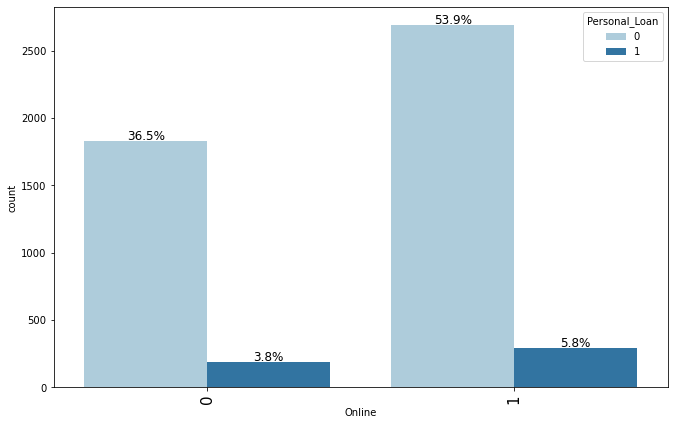

<Figure size 432x288 with 0 Axes>

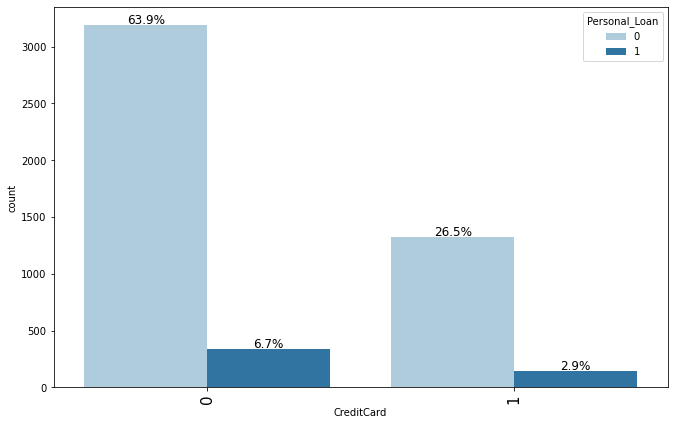

<Figure size 432x288 with 0 Axes>

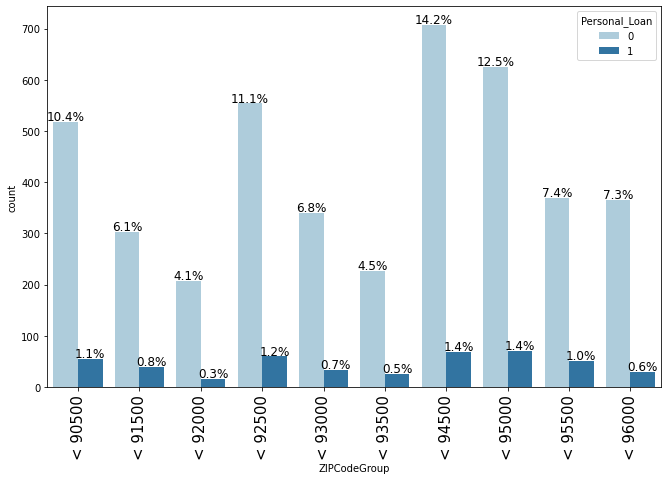

<Figure size 432x288 with 0 Axes>

<IPython.core.display.Javascript object>

In [37]:
# Creating a function to display the values of the attributes against the chart
for i, cols in zip(range(len(category_columnNames)), category_columnNames):
    labeled_barplot(df, cols, perc=True, n=10, hueCol="Personal_Loan")
    plt.tight_layout()


**Observation:**

- *Family with members of 3 (2.7%) and 4 (2.7%) seem to be availing more loans than the other two type of users even though the volume of members in 1 & 2 are more overall. There are around 40% of Type 3 & 4 who have not availed personal loans that can be reached by the marketing team*
- *Customer who have completed Professional education seem to have availed more loans (4.1%) than the other types, followed by Graduates (3.6%). Around 30% of customers under Professional education that be reached as part of the campaign* 
- *Customers without Securites account seems to have availed more personal loans (8.4%) than people who held a security account*
- *Customers without CD account seems to have availed more personal loans (6.8%) than people who held a CD account*
- *Online Customers have availed more personal loans 5.8% than regular customers. Another 54% of online customers can be used in the campaign by marketing team and advertising with promotions on the online banking portal*
- *Customers not using Credit cards from other banks seems to have availed more personal loans 6.7%*
- *Customers in the zip code of '< 94500' & '< 95000' range seem to have availed personal loans of around 1.4%. Possibility of more customers living in these locations*


#### Analyzing the Numerical attributes with Personal Loan

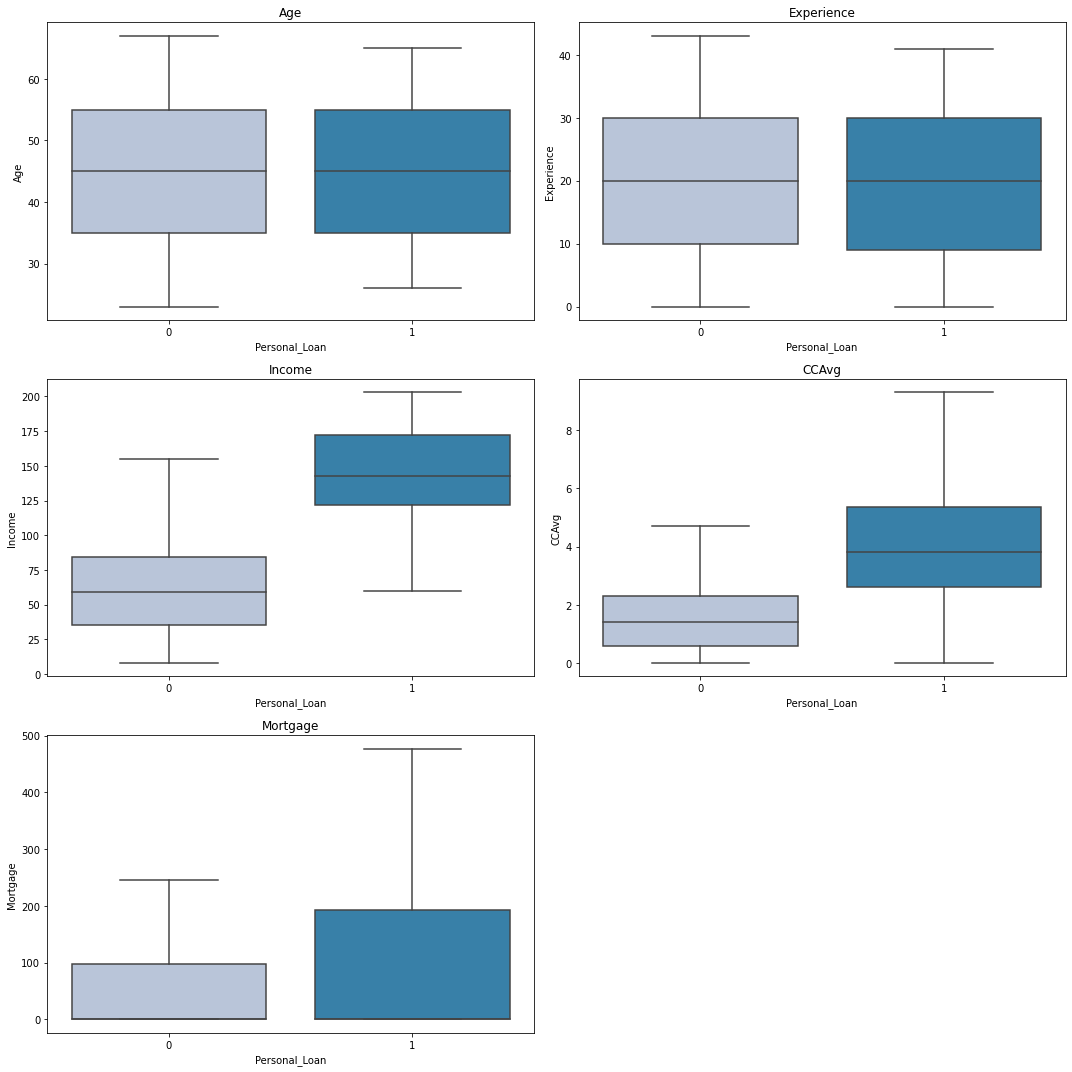

<IPython.core.display.Javascript object>

In [38]:
cols = df[["Age", "Experience", "Income", "CCAvg", "Mortgage"]].columns.tolist()
plt.figure(figsize=(15, 15))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(df["Personal_Loan"], df[variable], palette="PuBu", showfliers=False)
    plt.tight_layout()
    plt.title(variable)
plt.show()

**Observation:**

- *Age & Experience doesnt seem to be a critical factor. Its the same distribution for customers who have availed personal loand and those who havent yet*
- *Income plays a major player to be targeted for loan. Almost all existing loan users are having higher salary*
- *Customers with higher CC Average seems to have availed personal loans*
- *Most of the Mortgae users have applied for personal loan irrespective of the mortgage value*


**`Education` vs `Personal Loan`**

------------------------------  Volume  ------------------------------
Personal_Loan     0    1   All
Education                     
All            4519  480  4999
3              1296  205  1501
2              1220  182  1402
1              2003   93  2096
------------------------------  Percentage %  ------------------------------
Personal_Loan         0         1
Education                        
3              0.863424  0.136576
2              0.870185  0.129815
All            0.903981  0.096019
1              0.955630  0.044370
------------------------------------------------------------------------------------------------------------------------


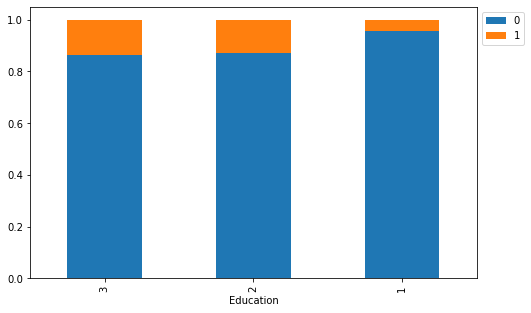

<IPython.core.display.Javascript object>

In [39]:
stacked_barplot(df, "Education", "Personal_Loan")

**Observations:**
* In the overall educated customers, 90% of the Customers dont have a personal loan and only 10% of them have one
* 14% of the Advanced/Professionals (Type 3) have taken loans, followed by 13% of the Graduates (Type 2)
* Only 4.4% of the Under Graduates (Type 1) have loans
* Considering the analysis, we can target the Type 3 and Type 2 customers, 

**`Family` vs `Personal Loan`**

------------------------------  Volume  ------------------------------
Personal_Loan     0    1   All
Family                        
All            4519  480  4999
4              1087  134  1221
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------  Percentage %  ------------------------------
Personal_Loan         0         1
Family                           
3              0.868317  0.131683
4              0.890254  0.109746
All            0.903981  0.096019
2              0.918210  0.081790
1              0.927310  0.072690
------------------------------------------------------------------------------------------------------------------------


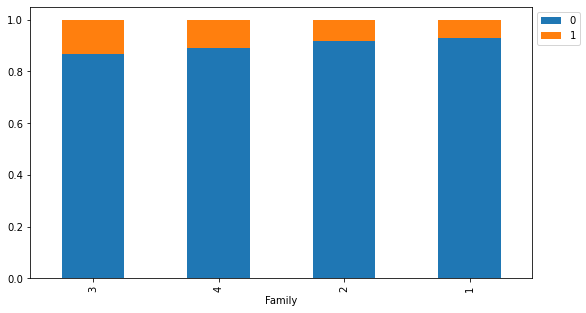

<IPython.core.display.Javascript object>

In [40]:
stacked_barplot(df, "Family", "Personal_Loan")

**Observations:**
* Mostly customers with family members of 3 (13%) & 4 (11%) have availed for loans when compared with other family types

**`Securities Account` vs `Personal Loan`**

------------------------------  Volume  ------------------------------
Personal_Loan          0    1   All
Securities_Account                 
All                 4519  480  4999
0                   4057  420  4477
1                    462   60   522
------------------------------  Percentage %  ------------------------------
Personal_Loan              0         1
Securities_Account                    
1                   0.885057  0.114943
All                 0.903981  0.096019
0                   0.906187  0.093813
------------------------------------------------------------------------------------------------------------------------


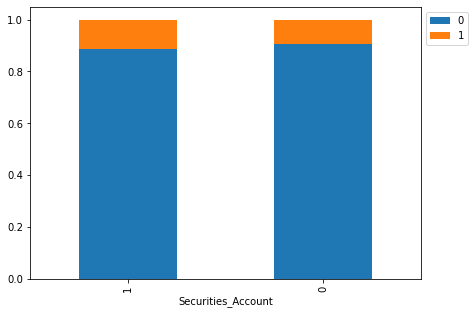

<IPython.core.display.Javascript object>

In [41]:
stacked_barplot(df, "Securities_Account", "Personal_Loan")

**Observations:**
* Among the customers with loans, only 11.5% of the users hold a Securities account
* Among the customers without loans, only 9.5% of the users hold a Securities account

**`CD Account` vs `Personal Loan`**

------------------------------  Volume  ------------------------------
Personal_Loan     0    1   All
CD_Account                    
All            4519  480  4999
0              4357  340  4697
1               162  140   302
------------------------------  Percentage %  ------------------------------
Personal_Loan         0         1
CD_Account                       
1              0.536424  0.463576
All            0.903981  0.096019
0              0.927613  0.072387
------------------------------------------------------------------------------------------------------------------------


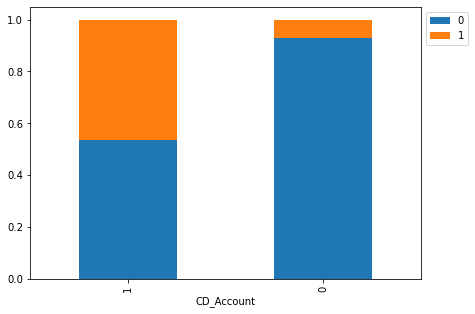

<IPython.core.display.Javascript object>

In [42]:
stacked_barplot(df, "CD_Account", "Personal_Loan")

**Observations:**
* Almost 46.4% of Certificate of deposit (CD) account holders, hold a personal loan

**`Online Users` vs `Personal Loan`**

------------------------------  Volume  ------------------------------
Personal_Loan     0    1   All
Online                        
All            4519  480  4999
1              2692  291  2983
0              1827  189  2016
------------------------------  Percentage %  ------------------------------
Personal_Loan         0         1
Online                           
1              0.902447  0.097553
All            0.903981  0.096019
0              0.906250  0.093750
------------------------------------------------------------------------------------------------------------------------


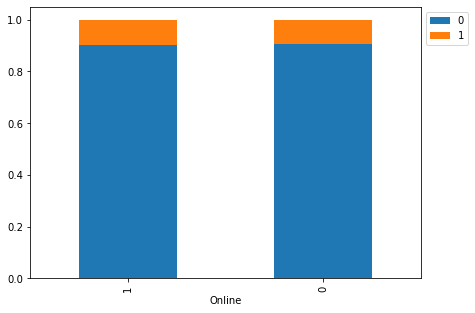

<IPython.core.display.Javascript object>

In [43]:
stacked_barplot(df, "Online", "Personal_Loan")

**Observations:**
* Within the online users, only 10% of them hold a personal loan

**`Credit Card Users` vs `Personal Loan`**

------------------------------  Volume  ------------------------------
Personal_Loan     0    1   All
CreditCard                    
All            4519  480  4999
0              3192  337  3529
1              1327  143  1470
------------------------------  Percentage %  ------------------------------
Personal_Loan         0         1
CreditCard                       
1              0.902721  0.097279
All            0.903981  0.096019
0              0.904506  0.095494
------------------------------------------------------------------------------------------------------------------------


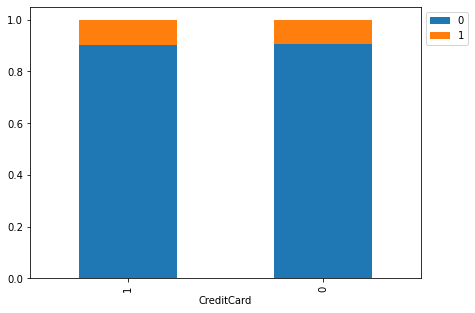

<IPython.core.display.Javascript object>

In [44]:
stacked_barplot(df, "CreditCard", "Personal_Loan")

**Observations:**
* Within the Credit Card users of other banks, only 10% of them hold a personal loan

**`CC Average` vs `Personal Loan`**

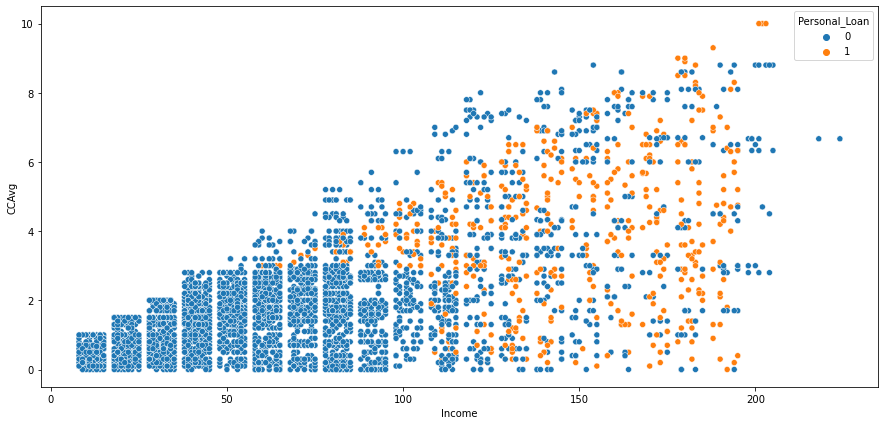

<IPython.core.display.Javascript object>

In [45]:
plt.figure(figsize=(15, 7))
sns.scatterplot(x="Income", y="CCAvg", data=df, hue="Personal_Loan")
plt.show()

**Observations:**
* Credit Card average seems to have a normal distribution, with increase on Card balance as the higher income customers spend more

**`Zipcode Group` vs `Income` vs `Personal Loan`**

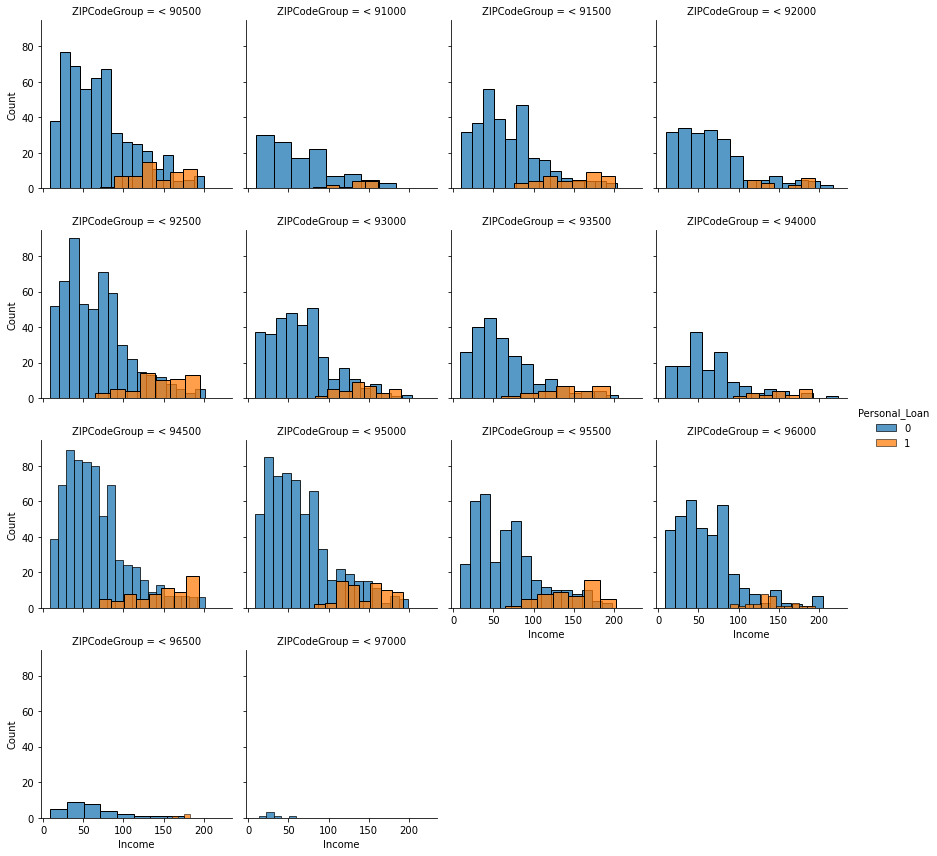

<IPython.core.display.Javascript object>

In [46]:
g = sns.FacetGrid(
    df, col="ZIPCodeGroup", hue="Personal_Loan", col_wrap=4, margin_titles=True
)
g.map(sns.histplot, "Income")
g.add_legend()

**Observations:**
* Wherever there are high Income customers, we see an increase on the number of Personal loan customers. The Group < 94500 seems to have a lot of high income users availing personal loans

**`Zipcode Group` vs `Income` vs `Age` vs `Personal Loan`**

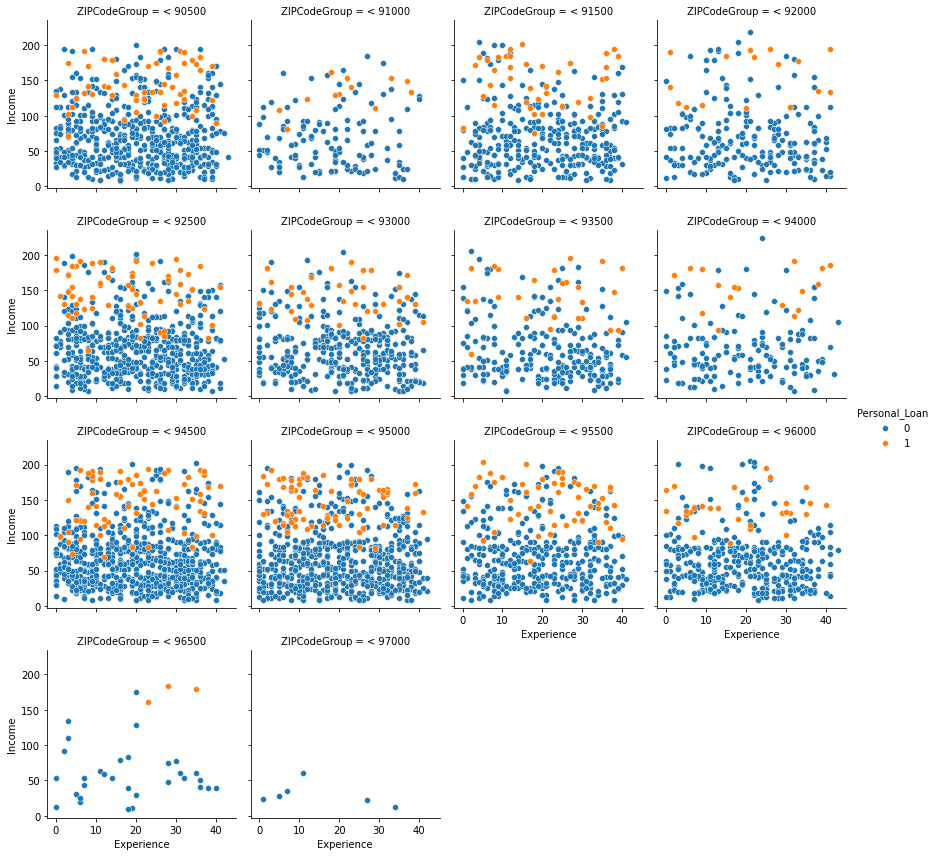

<IPython.core.display.Javascript object>

In [47]:
g = sns.FacetGrid(
    df, col="ZIPCodeGroup", hue="Personal_Loan", col_wrap=4, margin_titles=True
)
g.map(sns.scatterplot, "Experience", "Income")
g.add_legend()

**Observations:**
* Based on the earlier predictions, whichever zip codes that have high income users, they have more customers availing personal loans

**`Income` vs `Education` vs `Personal Loan`**

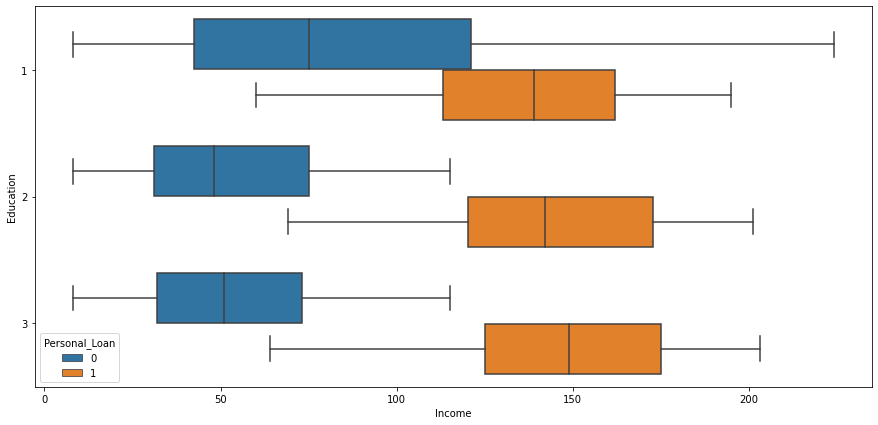

<IPython.core.display.Javascript object>

In [48]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="Income", y="Education", data=df, hue="Personal_Loan")
plt.show()

**Observations:**
* Approximately customers with annual income > 120K, seems to be availing loans
* Chance of high educated Graduates & Professionals type are availing more personal loans
* Irrespective of the level of Education, income seems to be the driving factor to avail loans

**`Age` vs `Mortgage` vs `Personal Loan`**

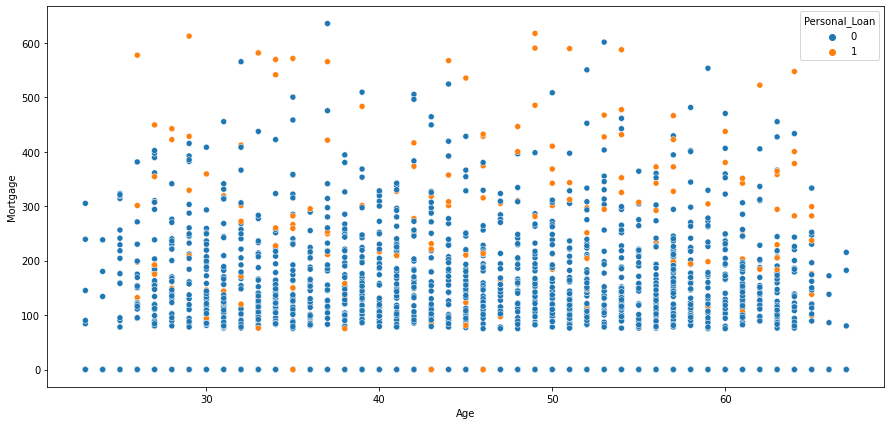

<IPython.core.display.Javascript object>

In [49]:
plt.figure(figsize=(15, 7))
sns.scatterplot(x="Age", y="Mortgage", data=df, hue="Personal_Loan")
plt.show()

**Observations:**
* Almost all customers irresoective of age have mortgage
* There's a mixed crowd of Personal loan users with mortgage more than 150K

**`Age` vs `Family` vs `Personal Loan`**

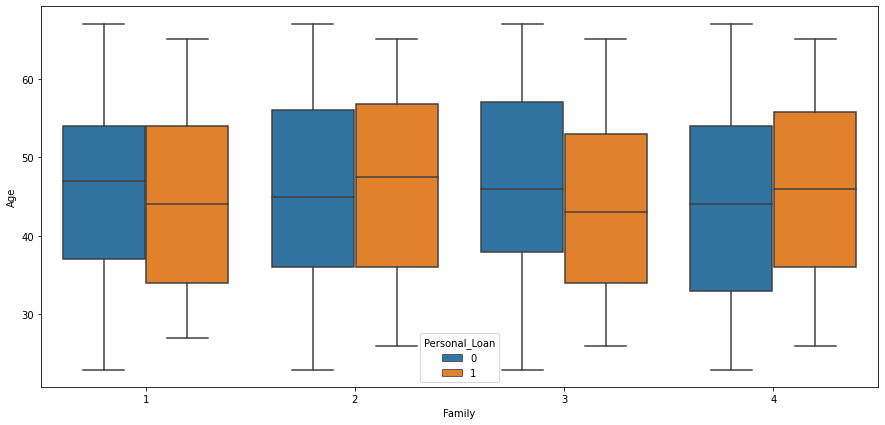

<IPython.core.display.Javascript object>

In [50]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="Family", y="Age", data=df, hue="Personal_Loan")
plt.show()

**Observations:**
* There is not much correlation between Age & Family & Personal Loan

**`Income` vs `Age` vs `Personal Loan`**

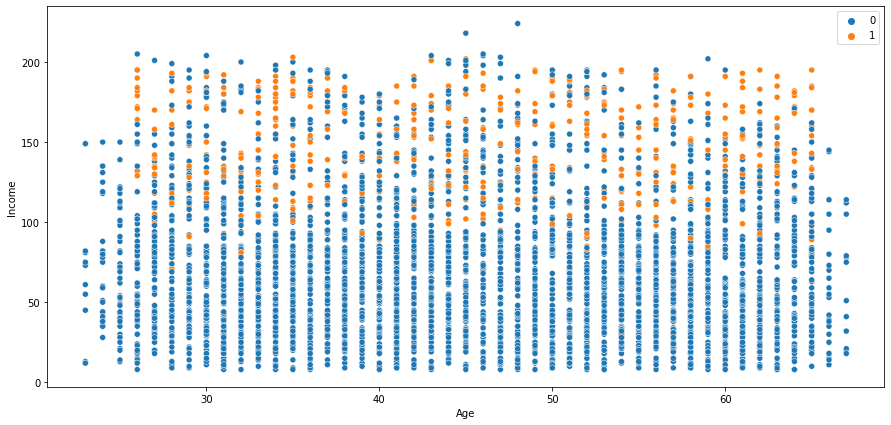

<IPython.core.display.Javascript object>

In [51]:
plt.figure(figsize=(15, 7))
sns.scatterplot(data=df, x=df["Age"], y=df["Income"], hue=df["Personal_Loan"], ci=0)
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

**Observations:**
* We can see that irrespective of age, high income users (> 120K) seems to be the primary customers availing Personal loans

**`Income` vs `Mortgage` vs `Personal Loan`**

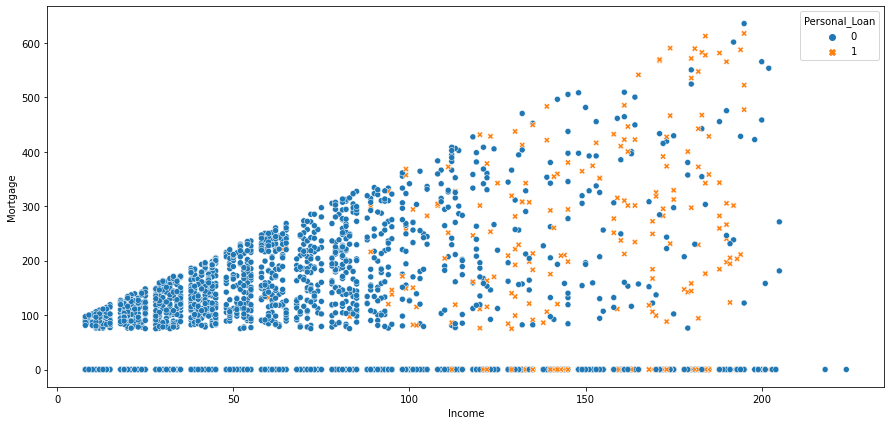

<IPython.core.display.Javascript object>

In [52]:
# Compairing with the Kilometers Driven
plt.figure(figsize=(15, 7))
sns.scatterplot(
    data=df, x="Income", y="Mortgage", hue="Personal_Loan", style="Personal_Loan"
)
plt.show()


**Observations:**
* All customers seems to have mortgage which is distributed nromally. As the income increases the mortgage also increses
* As analyzed earlier, Personal loan users fall into the category of > 120K

**`Age` vs `Experience` vs `Personal Loan`**

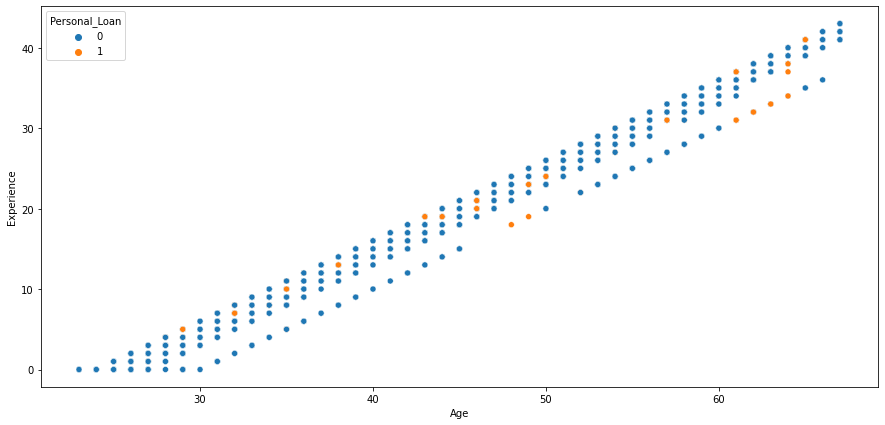

<IPython.core.display.Javascript object>

In [53]:
plt.figure(figsize=(15, 7))
sns.scatterplot(data=df, x="Age", y="Experience", ci=False, hue="Personal_Loan")
plt.show()

**Observations:**
* Experience is directly correlated with Age. As age increase the experience also increases.

**`Income` vs `Experience` vs `Personal Loan`**

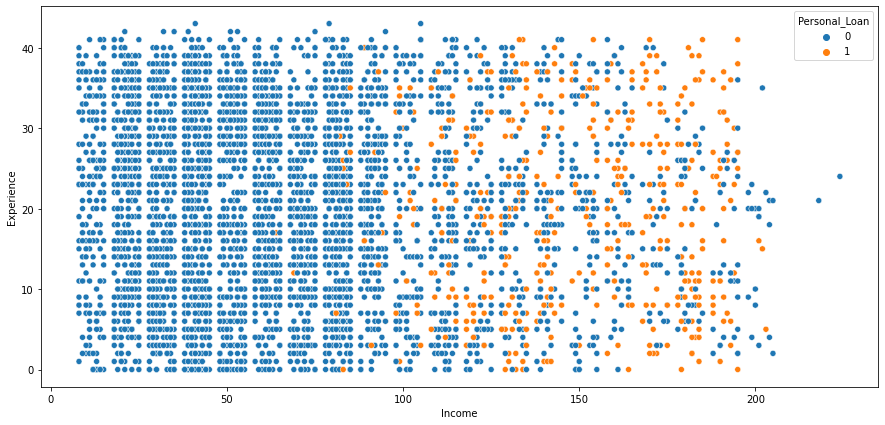

<IPython.core.display.Javascript object>

In [54]:
plt.figure(figsize=(15, 7))
sns.scatterplot(data=df, x="Income", y="Experience", ci=False, hue="Personal_Loan")
plt.show()

**Observations:**
* Income & Experience seems to be distorted. We see high income for less eprience users and vice versa.

In [55]:
# Considering ZIPCodes are not related the account details of the Customer and it doesnt play a
# significant role in identifying Personal loan customers apart from the Income distribution, we will drop the Column
df.drop(["ZIPCodeGroup"], axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)

<IPython.core.display.Javascript object>

<a id='eda1'></a>
### <a id='eda112'>Summary of EDA Analysis</a>

##### - *[Insights from Categorical Data](#inCategory1)*
  
##### - *[Insights from Numerical Data](#inNumber1)*
  
##### - *[Univariate Analysis Summary](#UnivariateAnalysis1)*
  
##### - *[Bivariate Analysis  Summary](#BivariateAnalysis1)*
  

---

## Model Building

<a id='evaluation1'></a>
### <a id='evaluation2'>Model evaluation criterion:</a>

### Model can make wrong predictions as:

1. Predicting a customer will apply for the loan but in reality the customer would not apply - Loss of resources

2. Predicting a customer will not apply for the loan but in reality the customer would have applied for the loan. - Loss of opportunity

### Which case is more important? 
* In the current context, the bank is planning to identify customers who will be availing personal loans and its more of an opportunity. We need to look at a higher Precision value to increase the opportunity and also the F1 score to balance both cases


### How to increase the customer to avail Personal loan i.e need to reduce False Negatives?
*  Higher the Precision value, we will able to identify the right Customers for the marketing team to help convince Customers to get loans. We will also look at the `f1_score` to be maximized, the greater the f1_score higher the chances of identifying both the classes correctly.

In [56]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1] 
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    #target, pred
    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf


<IPython.core.display.Javascript object>

In [57]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]  # Probability answer.
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## Split Data

In [1]:
df.info()

NameError: name 'df' is not defined

In [59]:
X = df.drop(["Personal_Loan"], axis=1)
Y = df["Personal_Loan"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
XX_train, XX_test, YY_train, YY_test = train_test_split(
    X, Y, test_size=0.30, random_state=1,
)

<IPython.core.display.Javascript object>

In [60]:
print("Shape of X Training set : ", XX_train.shape)
print("Shape of X test set : ", XX_test.shape)
print("Shape of Y Training set : ", YY_train.shape)
print("Shape of Y test set : ", YY_test.shape)

print("Percentage of classes in training set:")
print(YY_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(YY_test.value_counts(normalize=True))

Shape of X Training set :  (3499, 14)
Shape of X test set :  (1500, 14)
Shape of Y Training set :  (3499,)
Shape of Y test set :  (1500,)
Percentage of classes in training set:
0    0.906831
1    0.093169
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.897333
1    0.102667
Name: Personal_Loan, dtype: float64


<IPython.core.display.Javascript object>

* The Training & Test sets are uniformally split

### Modeling using Logistic Regression

In [61]:
# The newton-cg solver is faster for high-dimensional data
# lg = LogisticRegression(solver="newton-cg", random_state=1)

lg = LogisticRegression(solver="liblinear", random_state=1)

model = lg.fit(XX_train, YY_train)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

Regular - Training set performance:


Accuracy    Recall  Precision        F1
0  0.962561  0.674847   0.897959  0.770578

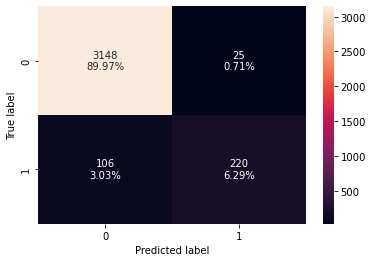

<IPython.core.display.Javascript object>

In [62]:
# creating confusion matrix for Training parameters
confusion_matrix_sklearn_with_threshold(
    lg, XX_train, YY_train,
)
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lg, XX_train, YY_train
)


print("Regular - Training set performance:")
log_reg_model_train_perf



#### Checking performance on test set

Regular - Testing set performance:


Accuracy   Recall  Precision        F1
0  0.949333  0.62987   0.836207  0.718519

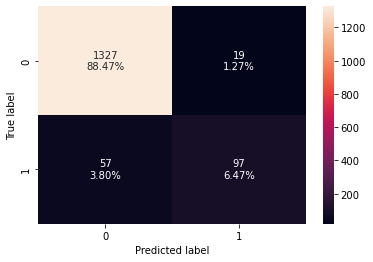

<IPython.core.display.Javascript object>

In [63]:
# creating confusion matrix for Testing parameters
confusion_matrix_sklearn_with_threshold(lg, XX_test, YY_test)

log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    lg, XX_test, YY_test
)

print("Regular - Testing set performance:")
log_reg_model_test_perf

### ROC Model Prediction

#### ROC On Training Set

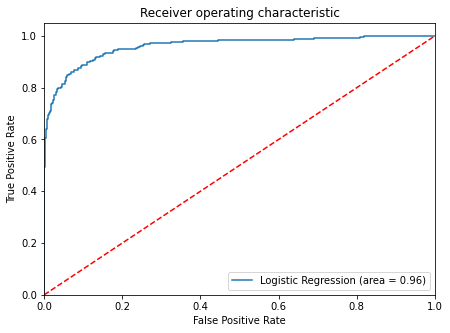

<IPython.core.display.Javascript object>

In [64]:
# Find the roc auc score for training data
logit_roc_auc_train = roc_auc_score(
    YY_train, lg.predict_proba(XX_train)[:, 1]
)  # The indexing represents predicted probabilities for class 1
# Find fpr, tpr and threshold values
fpr, tpr, thresholds = roc_curve(YY_train, lg.predict_proba(XX_train)[:, 1])
plt.figure(figsize=(7, 5))
# Plot roc curve
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

#### ROC On Testing Set

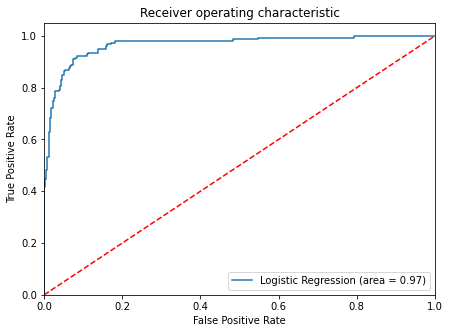

<IPython.core.display.Javascript object>

In [65]:
# Find the roc auc score for test data
logit_roc_auc_test = roc_auc_score(
    YY_test, lg.predict_proba(XX_test)[:, 1]
)  # The indexing represents predicted probabilities for class 1
# Find fpr, tpr and threshold values
fpr, tpr, thresholds = roc_curve(YY_test, lg.predict_proba(XX_test)[:, 1])
plt.figure(figsize=(7, 5))
# Plot roc curve
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Model is providing a generalized performance

### AUC - ROC Model Prediction

In [66]:
# Optimal threshold as per AUC-ROC curve
fpr, tpr, thresholds = roc_curve(
    YY_train, lg.predict_proba(XX_train)[:, 1]
)  # The indexing represents predicted probabilities for class 1

optimal_idx = np.argmax(
    tpr - fpr
)  # Finds the index that contains the max difference between tpr and fpr
optimal_threshold_auc_roc = thresholds[
    optimal_idx
]  # stores the optimal threshold value
print(optimal_threshold_auc_roc)

0.12516472768885611


<IPython.core.display.Javascript object>

#### Checking AUC-ROC model performance on training set

AUC - ROC - Training set performance:


Accuracy    Recall  Precision        F1
0  0.918548  0.865031   0.539197  0.664311

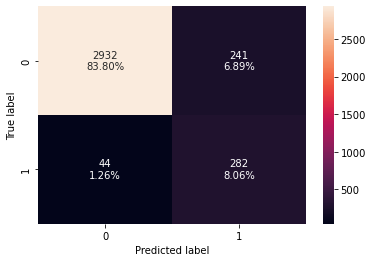

<IPython.core.display.Javascript object>

In [67]:
# creating confusion matrix for Training parameters
confusion_matrix_sklearn_with_threshold(
    lg, XX_train, YY_train, threshold=optimal_threshold_auc_roc
)

log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, XX_train, YY_train, threshold=optimal_threshold_auc_roc
)

print("AUC - ROC - Training set performance:")
log_reg_model_train_perf_threshold_auc_roc


#### Checking AUC-ROC model performance on testing set

AUC - ROC - Testing set performance:


Accuracy    Recall  Precision       F1
0  0.913333  0.922078   0.546154  0.68599

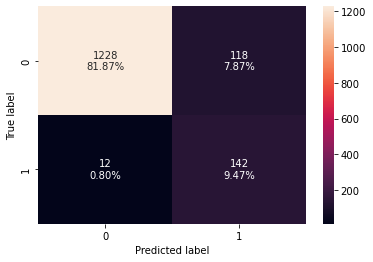

<IPython.core.display.Javascript object>

In [68]:
# creating confusion matrix for Testing parameters
confusion_matrix_sklearn_with_threshold(
    lg, XX_test, YY_test, threshold=optimal_threshold_auc_roc
)
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, XX_test, YY_test, threshold=optimal_threshold_auc_roc
)

print("AUC - ROC - Testing set performance:")
log_reg_model_test_perf_threshold_auc_roc

### Precision - Recall Curve Model Prediction

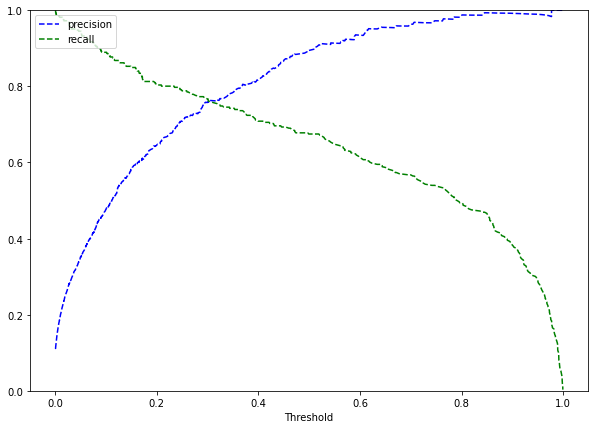

<IPython.core.display.Javascript object>

In [69]:
# Find the predicted probabilities for class 1
y_scores = lg.predict_proba(XX_train)[:, 1]
# Find fpr, tpr and threshold values
prec, rec, tre = precision_recall_curve(YY_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
# Plot recall precision curve
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [70]:
# setting the threshold
optimal_threshold_curve = 0.28

<IPython.core.display.Javascript object>

#### Checking Precision - Recall Curve model performance on training set

Precision/Recall Curve - Training set performance:


Accuracy    Recall  Precision    F1
0  0.951986  0.773006   0.728324  0.75

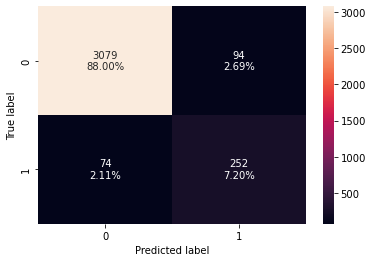

<IPython.core.display.Javascript object>

In [71]:
# creating confusion matrix for Training parameters
confusion_matrix_sklearn_with_threshold(
    lg, XX_train, YY_train, threshold=optimal_threshold_curve
)

log_reg_model_train_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, XX_train, YY_train, threshold=optimal_threshold_curve
)

print("Precision/Recall Curve - Training set performance:")
log_reg_model_train_perf_threshold_curve


#### Checking Precision - Recall Curve model performance on testing set

Precision/Recall Curve - Testing set performance:


Accuracy    Recall  Precision        F1
0      0.95  0.785714   0.742331  0.763407

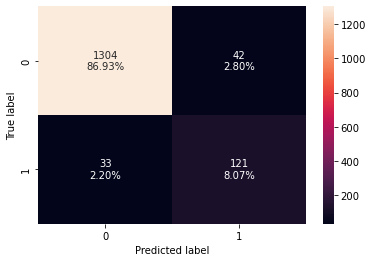

<IPython.core.display.Javascript object>

In [72]:
# creating confusion matrix for Testing parameters
confusion_matrix_sklearn_with_threshold(
    lg, XX_test, YY_test, threshold=optimal_threshold_curve
)

log_reg_model_test_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, XX_test, YY_test, threshold=optimal_threshold_curve
)

print("Precision/Recall Curve - Testing set performance:")
log_reg_model_test_perf_threshold_curve

### Model Performance Summary

In [73]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression - Default Threshold (0.5)",
    "Logistic Regression - AUC ROC Curve (0.125)",
    "Logistic Regression - Precision Recall Curve (0.28)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression - Default Threshold (0.5)  \
Accuracy                                        0.962561   
Recall                                          0.674847   
Precision                                       0.897959   
F1                                              0.770578   

           Logistic Regression - AUC ROC Curve (0.125)  \
Accuracy                                      0.918548   
Recall                                        0.865031   
Precision                                     0.539197   
F1                                            0.664311   

           Logistic Regression - Precision Recall Curve (0.28)  
Accuracy                                            0.951986    
Recall                                              0.773006    
Precision                                           0.728324    
F1                                                  0.750000

<IPython.core.display.Javascript object>

In [74]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression - Default Threshold (0.5)",
    "Logistic Regression - AUC ROC Curve (0.125)",
    "Logistic Regression - Precision Recall Curve (0.28)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression - Default Threshold (0.5)  \
Accuracy                                        0.949333   
Recall                                          0.629870   
Precision                                       0.836207   
F1                                              0.718519   

           Logistic Regression - AUC ROC Curve (0.125)  \
Accuracy                                      0.913333   
Recall                                        0.922078   
Precision                                     0.546154   
F1                                            0.685990   

           Logistic Regression - Precision Recall Curve (0.28)  
Accuracy                                            0.950000    
Recall                                              0.785714    
Precision                                           0.742331    
F1                                                  0.763407

<IPython.core.display.Javascript object>

<a id='modelbuilding1'></a>
### <a id='link2'>Summary of Model Building</a>

- We have been able to build a predictive model that can be used by the marketing team to find the customers who will avail person loan with a **Precision of 0.90 and an f1_score of 0.77 on the training set** using the **default threshold value**
- The Precision and F1 score for the other models are lower when computed using the different models
- From the model analysis, 
    * Factors like Age, Family_2, Securities_Account_1, Online_1, CreditCard_1 will lead to decrease in chances of a person availing personal loan
    * Factors like Experience, Income, CCAvg, Mortgage, all the levels of education,some levels of Family & CD Account_1 will lead to increase in chances of a person availing personal loan


<a id='Coefficients1'></a>
### <a id='Coefficients2'>Coefficients</a>

In [75]:
# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(lg.coef_, lg.intercept_),
    index=XX_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df.T

Age  Experience    Income     CCAvg  Mortgage  Family_2  \
Coefficients -0.348454    0.347457  0.054781  0.157769  0.000772 -0.536007   

              Family_3  Family_4  Education_2  Education_3  \
Coefficients  1.714419  1.408704     2.921237     3.213468   

              Securities_Account_1  CD_Account_1  Online_1  CreditCard_1  \
Coefficients             -0.653229      2.687457 -0.425074     -0.739591   

              Intercept  
Coefficients  -2.167676

<IPython.core.display.Javascript object>

### Coefficient interpretations

* Coefficient of Age, Family_2, Securities_Account_1, Online_1, CreditCard_1 are negative, increase in these will lead to decrease in chances of a person availing personal loan
* Coefficient of Experience, Income, CCAvg, Mortgage, all the levels of education,some levels of Family & CD Account_1are  positive, increase in these will lead to increase in chances of a person availing personal loan

In [76]:
# The equation of logistic regression for the Personal Loan

Equation = "Personal Loan = " + str(lg.intercept_)
print(Equation, end=" ")

for i in range(len(XX_train.columns)):
    if i != len(XX_train.columns) - 1:
        print(
            "+ (", lg.coef_[0][i], ")*(", XX_train.columns[i], ")", end="  ",
        )
    else:
        print("+ (", lg.coef_[0][i], ")*(", XX_train.columns[i], ")")

Personal Loan = [-2.16767608] + ( -0.34845414156923415 )*( Age )  + ( 0.34745726121014764 )*( Experience )  + ( 0.054781160645777725 )*( Income )  + ( 0.15776949897678955 )*( CCAvg )  + ( 0.0007715593935354776 )*( Mortgage )  + ( -0.5360072829452345 )*( Family_2 )  + ( 1.7144193783479456 )*( Family_3 )  + ( 1.408704452102081 )*( Family_4 )  + ( 2.921236845594285 )*( Education_2 )  + ( 3.213468247302963 )*( Education_3 )  + ( -0.6532292247111682 )*( Securities_Account_1 )  + ( 2.6874571980866877 )*( CD_Account_1 )  + ( -0.4250736783082536 )*( Online_1 )  + ( -0.7395913574262353 )*( CreditCard_1 )


<IPython.core.display.Javascript object>

###  Converting coefficients to odds

In [77]:
# converting coefficients to odds
odds = np.exp(lg.coef_[0])

# finding the percentage change
perc_change_odds = (np.exp(lg.coef_[0]) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=XX_train.columns).T

Age  Experience    Income      CCAvg  Mortgage   Family_2  \
Odds          0.705778    1.415464  1.056309   1.170896  1.000772   0.585080   
Change_odd% -29.422172   41.546381  5.630943  17.089627  0.077186 -41.492035   

               Family_3    Family_4  Education_2  Education_3  \
Odds           5.553450    4.090652    18.564234    24.865175   
Change_odd%  455.345012  309.065233  1756.423436  2386.517543   

             Securities_Account_1  CD_Account_1   Online_1  CreditCard_1  
Odds                     0.520363     14.694264   0.653722      0.477309  
Change_odd%            -47.963731   1369.426377 -34.627838    -52.269108

<IPython.core.display.Javascript object>

* `Age`: Holding all other features constant a 1 unit change in Age will decrease the odds of a person availing personal loan  by 0.71 times or a 29.0% decrease in odds.
* `Experience`: Holding all other features constant a 1 unit change in the Experience will decrease the odds of a person availing personal loan by 1.41 times or a 41.5% decrease in odds.
* `Income`: Holding all other features constant a 1 unit change in the Income will decrease the odds of a person availing personal loan by 1.05 times or a 5.63% decrease in odds.
* `CCAvg`: Holding all other features constant a 1 unit change in the CCAvg will decrease the odds of a person availing personal loan by 1.17 times or a 17.1% decrease in odds.
* `Mortgage`: Holding all other features constant a 1 unit change in the Mortgage will decrease the odds of a person availing personal loan by 1.0 times or a 0.1% decrease in odds.
<br>
..... interpreting the same analysis for other attributes as well

---

## Build Decision Tree Model
---

In [78]:
pdata = df.copy()

<IPython.core.display.Javascript object>

In [79]:
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 4999 non-null   int64   
 1   Experience          4999 non-null   int64   
 2   Income              4999 non-null   int64   
 3   Family              4999 non-null   category
 4   CCAvg               4999 non-null   float64 
 5   Education           4999 non-null   category
 6   Mortgage            4999 non-null   int64   
 7   Personal_Loan       4999 non-null   category
 8   Securities_Account  4999 non-null   category
 9   CD_Account          4999 non-null   category
 10  Online              4999 non-null   category
 11  CreditCard          4999 non-null   category
dtypes: category(7), float64(1), int64(4)
memory usage: 230.5 KB


<IPython.core.display.Javascript object>

### Split Data

In [80]:
X = pdata.drop("Personal_Loan", axis=1)
Y = pdata["Personal_Loan"].astype("int64")

X = pd.get_dummies(X, drop_first=True)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

x_train.head()

Age  Experience  Income  CCAvg  Mortgage  Family_2  Family_3  Family_4  \
1334   47          22      35    1.3         0         1         0         0   
4435   60          35      33    0.5         0         1         0         0   
65     59          35     131    3.8         0         0         0         0   
177    29           3      65    1.8       244         0         0         1   
2270   60          34     101    4.4         0         0         1         0   

      Education_2  Education_3  Securities_Account_1  CD_Account_1  Online_1  \
1334            0            0                     0             0         1   
4435            1            0                     0             0         1   
65              0            0                     0             0         1   
177             1            0                     0             0         0   
2270            0            0                     0             0         1   

      CreditCard_1  
1334             0  
4435             0  
65               1  
177              0  
2270             1

<IPython.core.display.Javascript object>

In [81]:
print(
    "{0:0.3f}% data is in training set".format((len(x_train) / len(pdata.index)) * 100)
)
print("{0:0.3f}% data is in test set".format((len(x_test) / len(pdata.index)) * 100))

69.994% data is in training set
30.006% data is in test set


<IPython.core.display.Javascript object>

In [82]:
print(
    "Original Loan Applied Values    : {0} ({1:0.2f}%)".format(
        len(pdata.loc[pdata["Personal_Loan"] == 1]),
        (len(pdata.loc[pdata["Personal_Loan"] == 1]) / len(pdata.index)) * 100,
    )
)
print(
    "Original Loan Declined Values   : {0} ({1:0.2f}%)".format(
        len(pdata.loc[pdata["Personal_Loan"] == 0]),
        (len(pdata.loc[pdata["Personal_Loan"] == 0]) / len(pdata.index)) * 100,
    )
)
print("")
print(
    "Training Loan Applied Values    : {0} ({1:0.2f}%)".format(
        len(y_train[y_train[:] == 1]),
        (len(y_train[y_train[:] == 1]) / len(y_train)) * 100,
    )
)
print(
    "Training Loan Declined Values   : {0} ({1:0.2f}%)".format(
        len(y_train[y_train[:] == 0]),
        (len(y_train[y_train[:] == 0]) / len(y_train)) * 100,
    )
)
print("")
print(
    "Test Loan Applied Values        : {0} ({1:0.3f}%)".format(
        len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1]) / len(y_test)) * 100
    )
)
print(
    "Test Loan Declined Values       : {0} ({1:0.3f}%)".format(
        len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0]) / len(y_test)) * 100
    )
)
print("")

Original Loan Applied Values    : 480 (9.60%)
Original Loan Declined Values   : 4519 (90.40%)

Training Loan Applied Values    : 326 (9.32%)
Training Loan Declined Values   : 3173 (90.68%)

Test Loan Applied Values        : 154 (10.267%)
Test Loan Declined Values       : 1346 (89.733%)



<IPython.core.display.Javascript object>

* The Training and Test sets have a uniform distribution for the analysis to be done

In [83]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [84]:
##  Function to calculate recall score
def get_DecisionTree_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    
    """
    pred = model.predict(predictors)

    #target, pred
    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf


<IPython.core.display.Javascript object>

### Build Decision Tree Model - Default values

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
* Since the frequency of customers applying for Personal loan (Class A) is 10% and the frequency of those not applied (Class B) is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes. In this case, we pass a dictionary {0:0.15,1:0.85} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

In [85]:
model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.15, 1: 0.85}, random_state=1
)
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on Training set

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

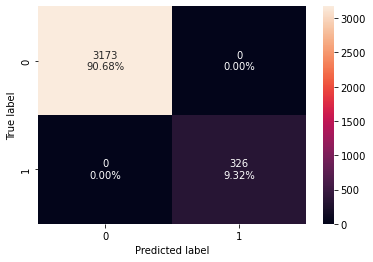

<IPython.core.display.Javascript object>

In [86]:
confusion_matrix_sklearn(model, x_train, y_train)
decision_tree_perf_train_default = get_DecisionTree_score(model, x_train, y_train)
decision_tree_perf_train_default

* Model is able to perfectly classify all the data points on the training set.
* 0 errors on the training set, each sample has been classified correctly.

#### Checking model performance on Test set

Accuracy    Recall  Precision        F1
0  0.982667  0.909091   0.921053  0.915033

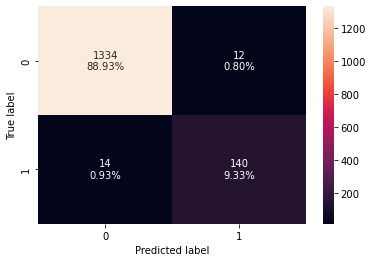

<IPython.core.display.Javascript object>

In [87]:
confusion_matrix_sklearn(model, x_test, y_test)
decision_tree_perf_test_default = get_DecisionTree_score(model, x_test, y_test)
decision_tree_perf_test_default

* There is disparity in performance of model on training set and test set, which suggests that the model is overfiiting.

#### Visualizing the Decision Tree

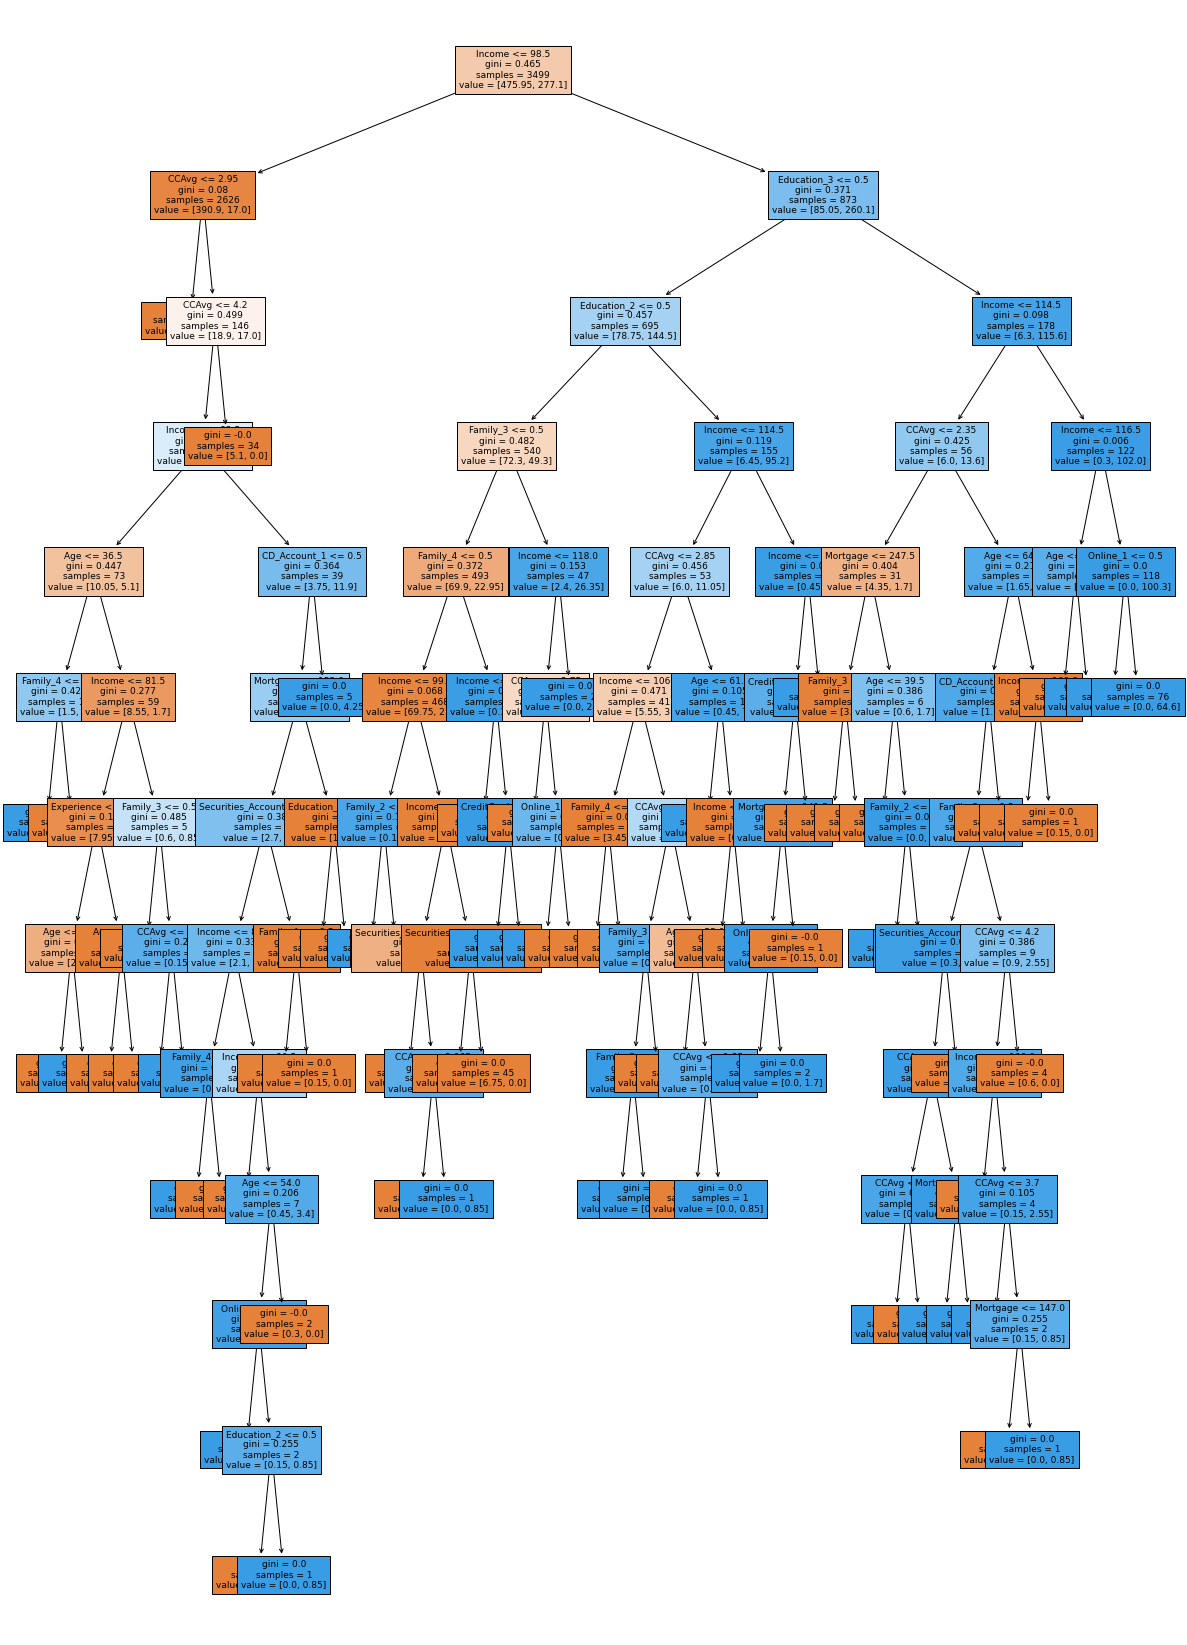

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [372.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CCAvg <= 4.20
|   |   |   |--- Income <= 82.50
|   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |   |--- weights: [0.00, 3.40] class: 1
|   |   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |   |--- weights: [1.50, 0.00] class: 0
|   |   |   |   |--- Age >  36.50
|   |   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |   |--- Experience <= 18.50
|   |   |   |   |   |   |   |--- Age <= 43.00
|   |   |   |   |   |   |   |   |--- weights: [2.40, 0.00] class: 0
|   |   |   |   |   |   |   |--- Age >  43.00
|   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |--- Experience >  18.50
|   |   |   |   |   |   |   |--- Age <= 43.50
|   |   |   |   |   |   |   |   |--- weights: [0.30, 0.00] class: 0
|   |   |   |   |   |   |   |--- Age >  43.50
|   |   |   |   |   |   |   

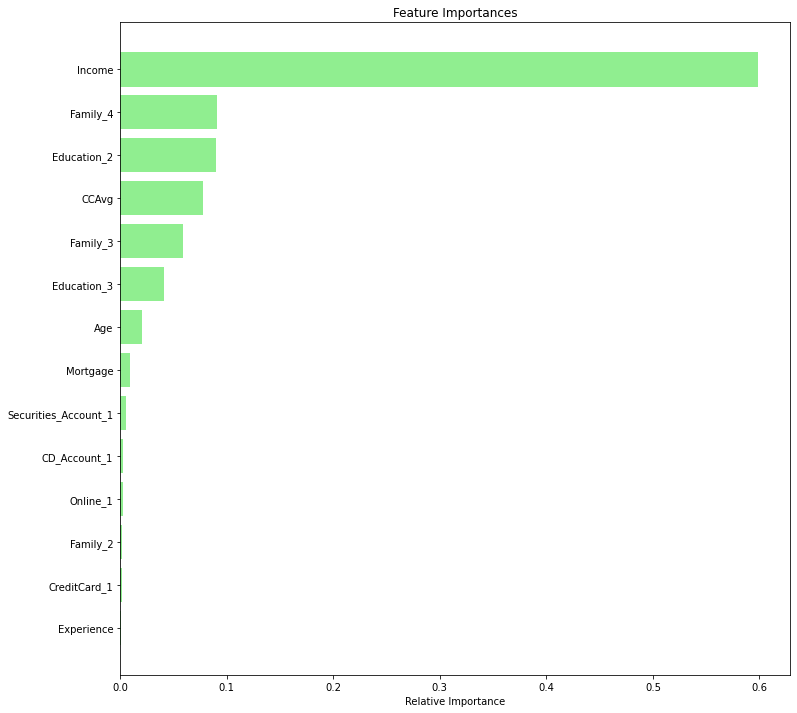

<IPython.core.display.Javascript object>

In [88]:
## creating a list of column names
feature_names = x_train.columns.to_list()
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=x_train.columns
    ).sort_values(by="Imp", ascending=False)
)

importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="lightgreen", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


**Observations:**
* The Precision & F1 Score has a score of 1 on the training data which shows that the training has been generalized and the Tree has expanded itself to the maximum pure nodes with 12 layers
* Income, Family_4, Education_2 (Graduates), CC Average, Family_4, Education_3 (Professional), Age, Experience  are the important features identified as being considered for identifying Customers that will buy a personal loan in this model


### Build Decision Tree Model - Max Depth (5)

In [89]:
model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.15, 1: 0.85}, max_depth=5, random_state=1
)
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, max_depth=5,
                       random_state=1)

<IPython.core.display.Javascript object>

#### Checking performance on training set

In [90]:
decision_tree_perf_train_depth5 = get_DecisionTree_score(model, x_train, y_train)
decision_tree_perf_train_depth5

Accuracy    Recall  Precision        F1
0  0.981137  0.966258   0.851351  0.905172

<IPython.core.display.Javascript object>

#### Checking performance on testing set

In [91]:
decision_tree_perf_test_depth5 = get_DecisionTree_score(model, x_test, y_test)
decision_tree_perf_test_depth5

Accuracy    Recall  Precision        F1
0      0.98  0.961039   0.860465  0.907975

<IPython.core.display.Javascript object>

#### Visualizing the Decision Tree

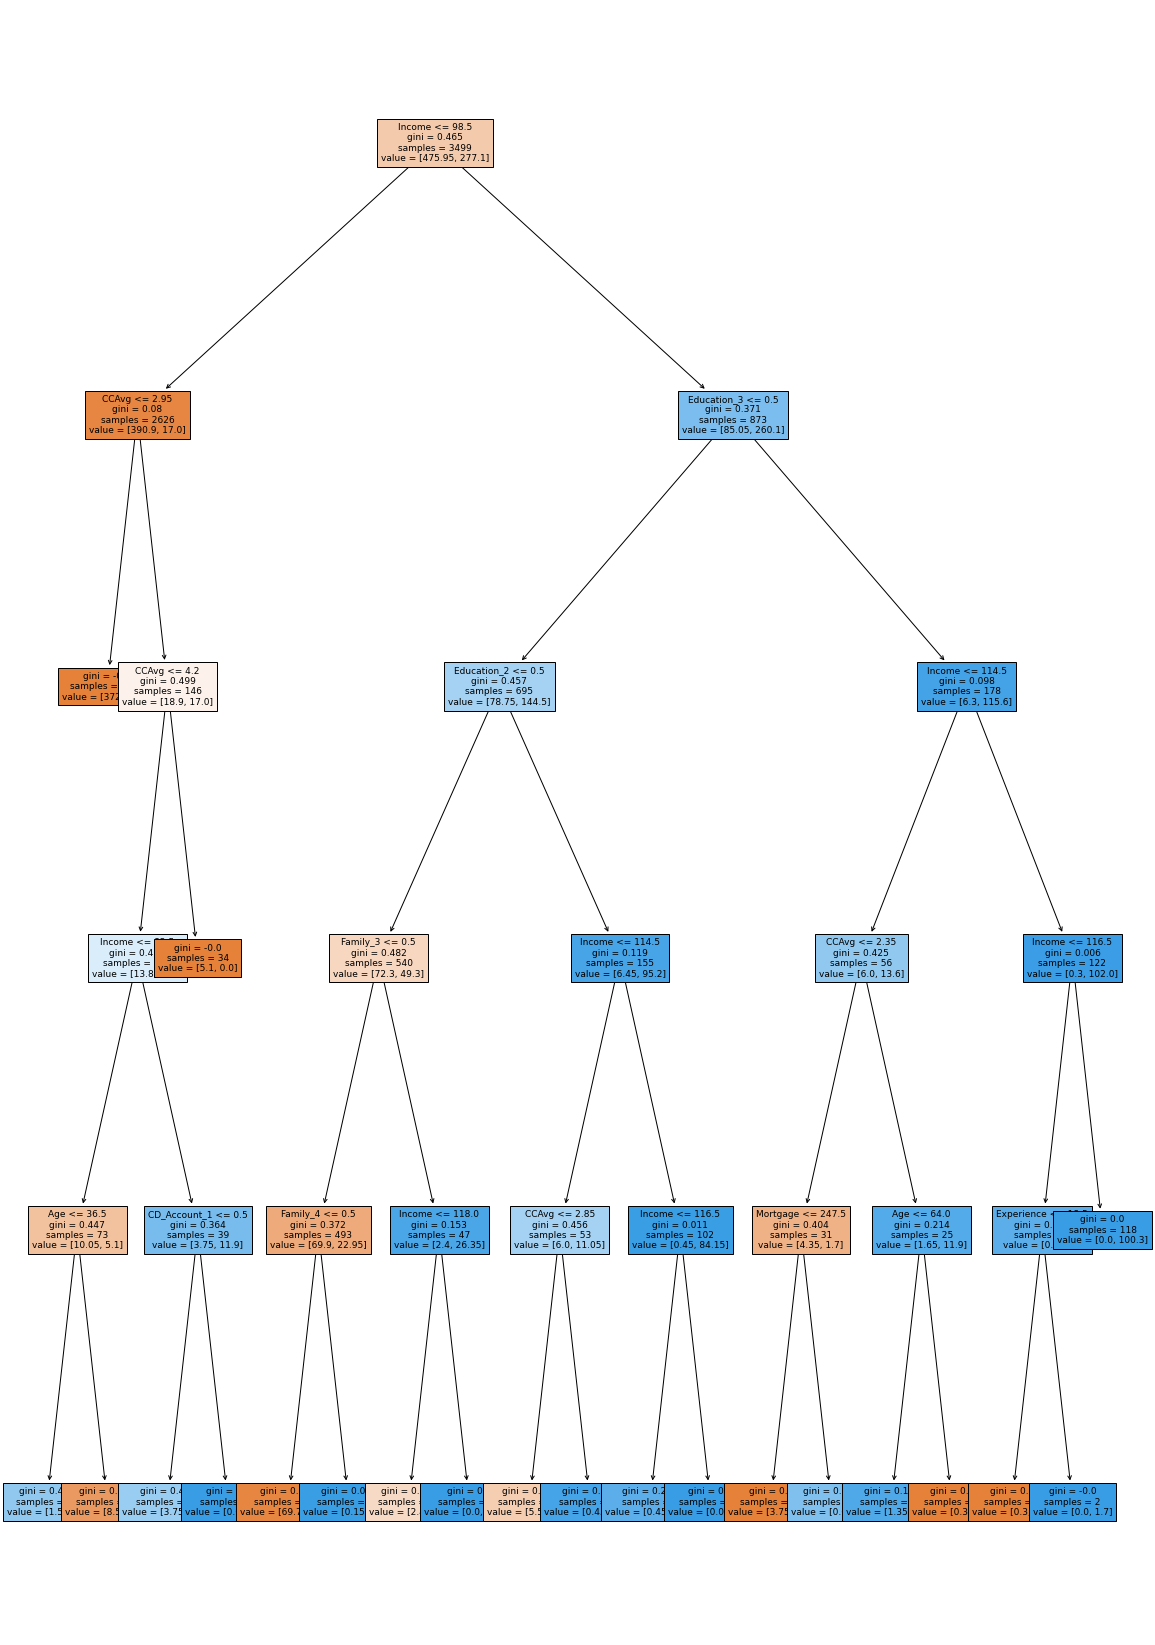

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [372.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CCAvg <= 4.20
|   |   |   |--- Income <= 82.50
|   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |--- weights: [1.50, 3.40] class: 1
|   |   |   |   |--- Age >  36.50
|   |   |   |   |   |--- weights: [8.55, 1.70] class: 0
|   |   |   |--- Income >  82.50
|   |   |   |   |--- CD_Account_1 <= 0.50
|   |   |   |   |   |--- weights: [3.75, 7.65] class: 1
|   |   |   |   |--- CD_Account_1 >  0.50
|   |   |   |   |   |--- weights: [0.00, 4.25] class: 1
|   |   |--- CCAvg >  4.20
|   |   |   |--- weights: [5.10, 0.00] class: 0
|--- Income >  98.50
|   |--- Education_3 <= 0.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- Family_3 <= 0.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- weights: [69.75, 2.55] class: 0
|   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |--- weights: [0.15, 20.40] class: 1
|   |   |   |--- Family_3 >  0.50
| 

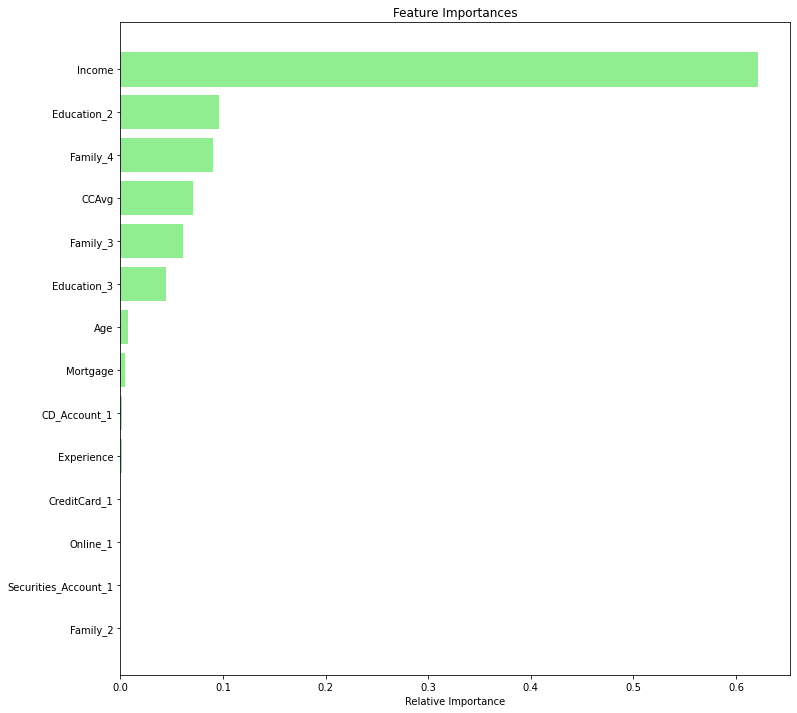

<IPython.core.display.Javascript object>

In [92]:
## creating a list of column names
feature_names = x_train.columns.to_list()
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=x_train.columns
    ).sort_values(by="Imp", ascending=False)
)

importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="lightgreen", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**
* The Precision & F1 Score values have dropped with a max depth set to 5. We will proceed to perform the Hyperparameter validation to find the right depth
* Income, Education_2 (Graduates), Family_4, CC Average, Family_3, Education_3 (Professional) & Age are the important features identified as being considered for identifying Customers that will buy a personal loan in this model


### Build using GridSearch for Hyperparameter tuning of our tree model to reduce over fitting

In [93]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})

# Grid of parameters to choose from
parameters = {
    "max_depth": [1, 2, 4, 8, 10],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(precision_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=3)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, max_depth=8,
                       max_leaf_nodes=10, min_impurity_decrease=1e-05,
                       min_samples_leaf=10, random_state=1)

<IPython.core.display.Javascript object>

#### Checking performance on training set

Accuracy    Recall  Precision    F1
0  0.971992  0.923313   0.804813  0.86

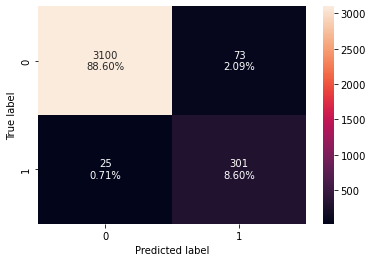

<IPython.core.display.Javascript object>

In [94]:
confusion_matrix_sklearn(estimator, x_train, y_train)
decision_tree_tune_perf_train_hyper = get_DecisionTree_score(
    estimator, x_train, y_train
)
decision_tree_tune_perf_train_hyper

#### Checking performance on testing set

Accuracy   Recall  Precision        F1
0     0.974  0.87013   0.875817  0.872964

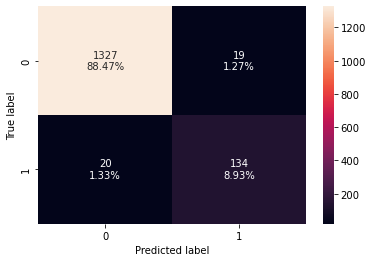

<IPython.core.display.Javascript object>

In [95]:
confusion_matrix_sklearn(estimator, x_test, y_test)
decision_tree_tune_perf_test_hyper = get_DecisionTree_score(estimator, x_test, y_test)
decision_tree_tune_perf_test_hyper

#### Visualizing the Decision Tree

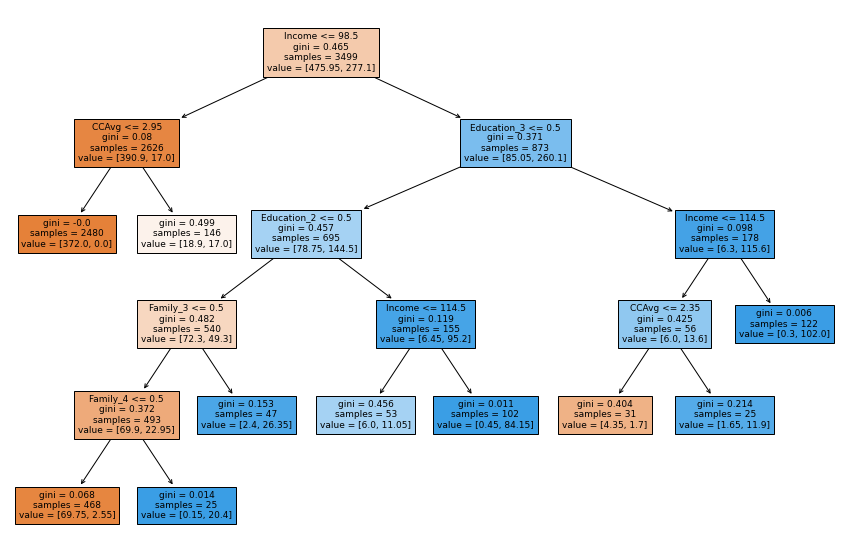

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [372.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [18.90, 17.00] class: 0
|--- Income >  98.50
|   |--- Education_3 <= 0.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- Family_3 <= 0.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- weights: [69.75, 2.55] class: 0
|   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |--- weights: [0.15, 20.40] class: 1
|   |   |   |--- Family_3 >  0.50
|   |   |   |   |--- weights: [2.40, 26.35] class: 1
|   |   |--- Education_2 >  0.50
|   |   |   |--- Income <= 114.50
|   |   |   |   |--- weights: [6.00, 11.05] class: 1
|   |   |   |--- Income >  114.50
|   |   |   |   |--- weights: [0.45, 84.15] class: 1
|   |--- Education_3 >  0.50
|   |   |--- Income <= 114.50
|   |   |   |--- CCAvg <= 2.35
|   |   |   |   |--- weights: [4.35, 1.70] class: 0
|   |   |   |--- CCAvg >  2.35
|   |   |   |   |--- weights: [1.65, 11.90] class: 1
|   |   |--- I

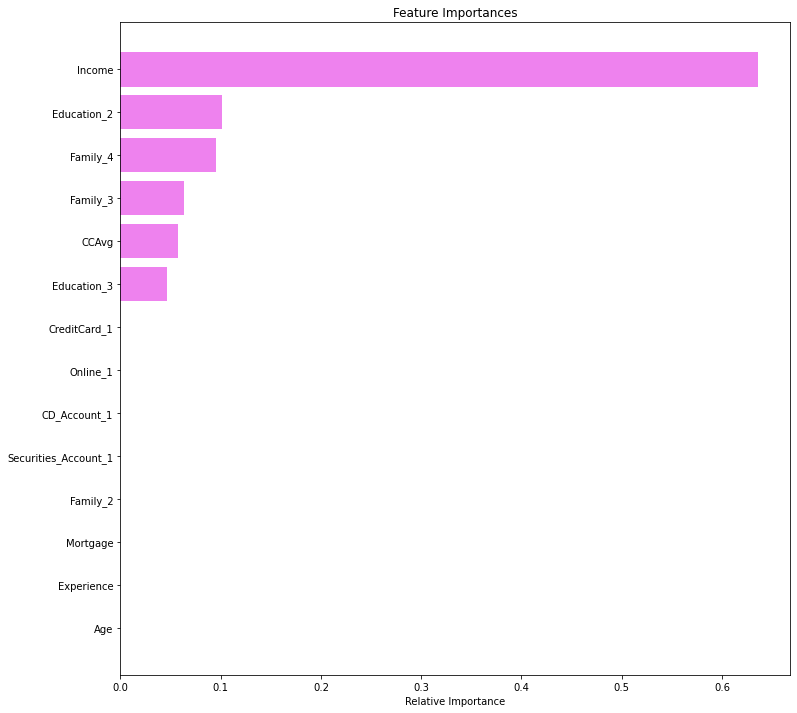

<IPython.core.display.Javascript object>

In [96]:
## creating a list of column names
feature_names = x_train.columns.to_list()
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=x_train.columns
    ).sort_values(by="Imp", ascending=False)
)

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


**Observations:**
* Decision tree model with GridSearch Hyperparameter tuning has given a **Precision of 0.80 & F1 score of 0.0.86 on training data** which is **lesser than the scored obtained from the max depth of 5**. We need to check on the post prunning for better scores
* Income, Education_2 (Graduates), Family_4, Family_3, CCAvg & Education_3 (Professional)  are the important features identified as being considered for identifying Customers that will buy a personal loan in this model


### Build using Cost Complexity Pruning - DecisionTreeClassifier

In [97]:
# Fining impurities and alpha values
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

In [98]:
pd.DataFrame(path).head(15)

ccp_alphas    impurities
0   0.000000e+00 -9.183249e-15
1   7.518940e-19 -9.182498e-15
2   7.518940e-19 -9.181746e-15
3   7.518940e-19 -9.180994e-15
4   1.525902e-18 -9.179468e-15
5   2.255682e-18 -9.177212e-15
6   2.344140e-18 -9.174868e-15
7   2.786431e-18 -9.172082e-15
8   3.870042e-18 -9.168212e-15
9   4.091188e-18 -9.164120e-15
10  4.688280e-18 -9.159432e-15
11  8.204490e-18 -9.151228e-15
12  1.203030e-17 -9.139197e-15
13  4.436174e-17 -9.094836e-15
14  1.092237e-16 -8.985612e-15

<IPython.core.display.Javascript object>

#### Total Impurity vs effective alpha for training set

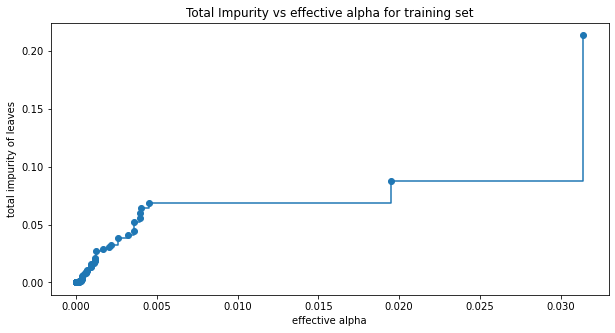

<IPython.core.display.Javascript object>

In [99]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [100]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2516473313865191


<IPython.core.display.Javascript object>

#### Number of Nodes/Depth vs Alpha

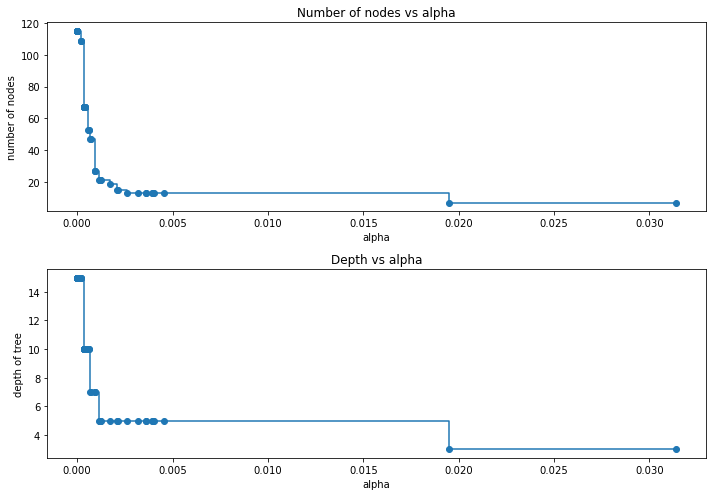

<IPython.core.display.Javascript object>

In [101]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#### Accuracy vs alpha for training and testing sets

In [102]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

<IPython.core.display.Javascript object>

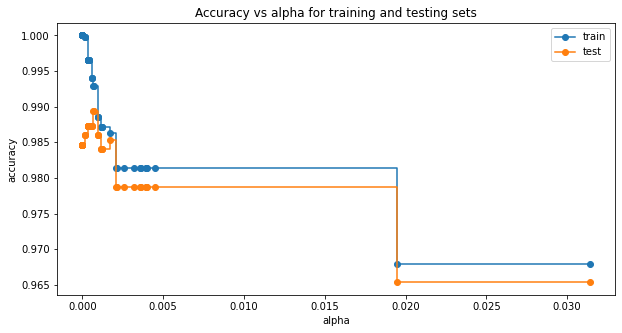

<IPython.core.display.Javascript object>

In [103]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

**Maximum value of Accuracy Score is at 0.040 alpha, but if we choose decision tree will only have a root node and we would lose the business rules. The best aplha for this accuracy is calculate below:**

In [104]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print("Training accuracy of best model: ", best_model.score(x_train, y_train))
print("Test accuracy of best model: ", best_model.score(x_test, y_test))

DecisionTreeClassifier(ccp_alpha=0.0006739011369009341, random_state=1)
Training accuracy of best model:  0.9928551014575593
Test accuracy of best model:  0.9893333333333333


<IPython.core.display.Javascript object>

**Since accuracy isn't the right metric for our data we would want higher Precision/F1 Score**

### Training the data with Precision score using the Cost Complexity Pruning - DecisionTreeClassifier

In [105]:
Precision_train = []
for clf in clfs:
    pred_train3 = clf.predict(x_train)
    values_train = precision_score(y_train, pred_train3)
    Precision_train.append(values_train)

<IPython.core.display.Javascript object>

In [106]:
Precision_test = []
for clf in clfs:
    pred_test3 = clf.predict(x_test)
    values_test = precision_score(y_test, pred_test3)
    Precision_test.append(values_test)

<IPython.core.display.Javascript object>

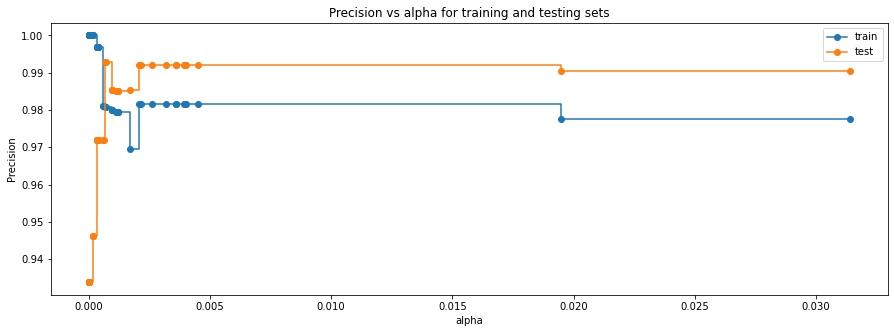

<IPython.core.display.Javascript object>

In [107]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Precision")
ax.set_title("Precision vs alpha for training and testing sets")
ax.plot(ccp_alphas, Precision_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, Precision_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [108]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(Precision_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0006739011369009341, random_state=1)


<IPython.core.display.Javascript object>

In [109]:
best_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0006739011369009341, random_state=1)

<IPython.core.display.Javascript object>

#### Checking performance on training set

Accuracy    Recall  Precision        F1
0  0.992855  0.941718   0.980831  0.960876

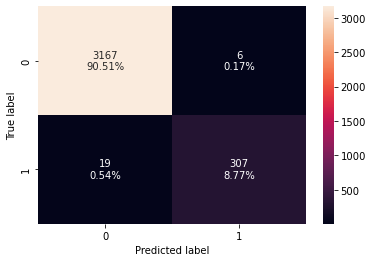

<IPython.core.display.Javascript object>

In [110]:
confusion_matrix_sklearn(best_model, x_train, y_train)
decision_tree_postpruned_perf_train = get_DecisionTree_score(
    best_model, x_train, y_train
)
decision_tree_postpruned_perf_train

#### Checking performance on testing set

Accuracy    Recall  Precision        F1
0  0.989333  0.902597   0.992857  0.945578

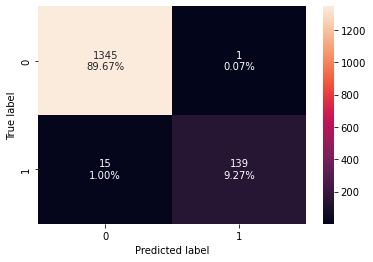

<IPython.core.display.Javascript object>

In [111]:
confusion_matrix_sklearn(best_model, x_test, y_test)
decision_tree_postpruned_perf_test = get_DecisionTree_score(best_model, x_test, y_test)
decision_tree_postpruned_perf_test

#### Visualizing the Decision Tree

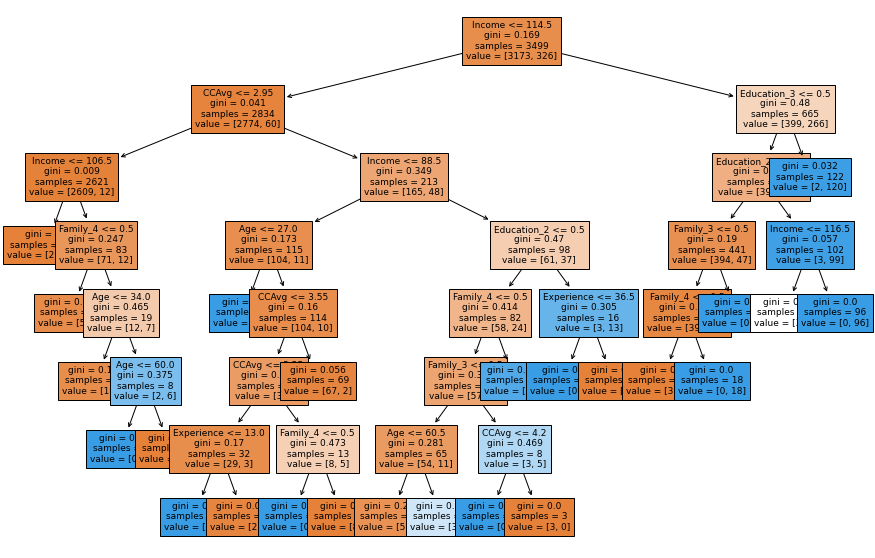

|--- Income <= 114.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2538.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family_4 <= 0.50
|   |   |   |   |--- weights: [59.00, 5.00] class: 0
|   |   |   |--- Family_4 >  0.50
|   |   |   |   |--- Age <= 34.00
|   |   |   |   |   |--- weights: [10.00, 1.00] class: 0
|   |   |   |   |--- Age >  34.00
|   |   |   |   |   |--- Age <= 60.00
|   |   |   |   |   |   |--- weights: [0.00, 6.00] class: 1
|   |   |   |   |   |--- Age >  60.00
|   |   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 88.50
|   |   |   |--- Age <= 27.00
|   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |--- Age >  27.00
|   |   |   |   |--- CCAvg <= 3.55
|   |   |   |   |   |--- CCAvg <= 3.25
|   |   |   |   |   |   |--- Experience <= 13.00
|   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |   |--- Experience >  13.00
| 

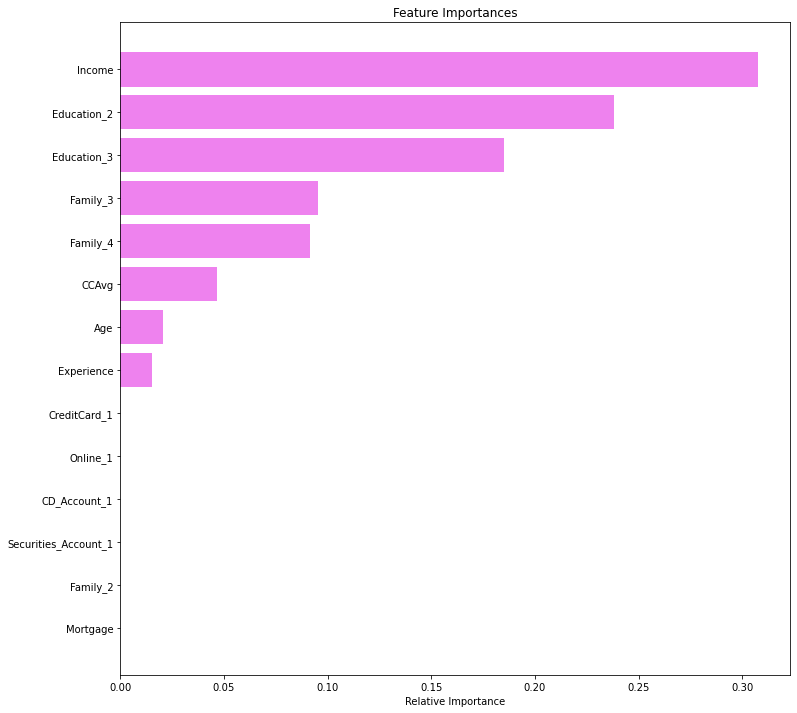

<IPython.core.display.Javascript object>

In [112]:
plt.figure(figsize=(15, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=x_train.columns
    ).sort_values(by="Imp", ascending=False)
)

importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


### Comparing all the decision tree models

In [113]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train_default.T,
        decision_tree_perf_train_depth5.T,
        decision_tree_tune_perf_train_hyper.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "dtree_perf_train_default",
    "dtree_perf_train_depth5",
    "dtree_tune_perf_train_hyper",
    "dtree_postpruned_perf_train",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


dtree_perf_train_default  dtree_perf_train_depth5  \
Accuracy                        1.0                 0.981137   
Recall                          1.0                 0.966258   
Precision                       1.0                 0.851351   
F1                              1.0                 0.905172   

           dtree_tune_perf_train_hyper  dtree_postpruned_perf_train  
Accuracy                      0.971992                     0.992855  
Recall                        0.923313                     0.941718  
Precision                     0.804813                     0.980831  
F1                            0.860000                     0.960876

<IPython.core.display.Javascript object>

In [114]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test_default.T,
        decision_tree_perf_test_depth5.T,
        decision_tree_tune_perf_test_hyper.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "dtree_perf_test_default",
    "dtree_perf_test_depth5",
    "dtree_tune_perf_test_hyper",
    "dtree_postpruned_perf_test",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


dtree_perf_test_default  dtree_perf_test_depth5  \
Accuracy                  0.982667                0.980000   
Recall                    0.909091                0.961039   
Precision                 0.921053                0.860465   
F1                        0.915033                0.907975   

           dtree_tune_perf_test_hyper  dtree_postpruned_perf_test  
Accuracy                     0.974000                    0.989333  
Recall                       0.870130                    0.902597  
Precision                    0.875817                    0.992857  
F1                           0.872964                    0.945578

<IPython.core.display.Javascript object>

**Observations:**
* Decision tree model with Cost Complexity Pruning tuning has given a best **Precision of 0.98 & F1 score of 0.96 on training data** which is **better than all the other decision tree models**. 
* **Income, Education_2 (Graduates) & Education_3 (Professional), Family_3, Family_4, CC Average, Age and Experience** are the important features identified as being considered for identifying Customers that will buy a personal loan in this model


<a id='modeltree1'></a>
### <a id='modeltree2'>Summary of Decision Model Tree Analysis</a>


* We analyzed the Customer information using different techniques and used Decision Tree Classifier to build a predictive model for the same. This model built can be used to predict if a customer will be interested to avail the Personal Loan
* We visualized different trees and their confusion matrix to get a better understanding of the model and reduce overfitting
* The pre-pruned and the post-pruned models have reduced overfitting and the model is giving a generalized performance
 
* Decision tree model with **Post-pruning has given the best Precision of 0.98 & F1 score of 0.96 on training data and Precision of 0.99 & 0.95 on the testing data**.
* It has been identified that the **Income, Education_2 (Graduates) & Education_3 (Professional), Family_3, Family_4, CC Average, Age and Experience** are the important features that needs to be considered for identifying Customers that will buy a personal loan using this Decision Tree modeling


<a id='comparison1'></a>
### <a id='comparison2'>Comparisons - Logistic Regression VS Decision Tree</a>

#### Logistic Regression

- Logistic Regression Analysis provided a **Precision of 0.90 and an f1_score of 0.77** on the training set using the default threshold value.
    * **Factors like Experience, Income, CCAvg, Mortgage, all the levels of education,some levels of Family & CD Account_1** will lead to increase in chances of a person availing personal loan

#### Decision Tree Analysis

- Decision tree model with post-pruning has given the best **Precision of 0.98 & F1 score of 0.96 on training data**
- The pre-pruned and the post-pruned models have reduced overfitting and the model is giving a generalized performance.
    * **Income, Education_2 (Graduates) & Education_3 (Professional), Family_3, Family_4, CC Average, Age and Experience** are the important features that needs to be considered for identifying Customers that will buy a personal loan


<a id='recommend1'></a>
### <a id='recommend2'>Recommendations:</a>


* According to the best Decision tree model:
    - *a) If a customer has an income greater than 114 and has customers with Education as Graduates/Professional or with family members size greater than 2, then there is a very high chance that the customer will apply for a personal loan.*
    - *b) If a customer has an income less than 114 and has family members with size less than 2 or Education is of type Undergrads, then there is a very high chance that the customer will NOT apply for a personal loan.*

* Customers with family size of 4 or 3 have a high chance of taking loans to meet their family needs.Lycrative interest rates would help atttract family members to take personal loans to cover their family expenses
* Customers who are Graduates & Professional are at a higher chance of taking loans to cover their educational needs. Probably marketing team can offer better interest rates or discounts to attrack them to take loans 
* We see that there are significant Undergrads but very low volume have a personal loan. Marketing team can approach the Undergrads to provide loans to help them do higher education
* Aged customers can be provided discounts to avail personal loans to cover their welfare home needs, medical expenses & hospital needs
* Customers with high credit card balance can be approached to consolidate their credit card balances 
* We see the trend of online Customers are increasing and they have availed loans in the sample. Marketing team can campaign in the online banking portal inviting Customers to avail personal loans


### Summary Section References:



##### - *[Summary of Data Analysis](#dataanalysis1)*
##### - *[EDA Summary](#eda1)*
##### - *[Model evaluation criterion](#evaluation1)*
##### - *[Model Building Summary](#modelbuilding1)*
- *[Coefficients Summary](#Coefficients1)*

##### - *[Decision Model Tree Analysis Summary](#modeltree1)*
##### - *[Comparisons - Decision tree VS Logistic regression](#comparison1)*
##### - *[Recommendations](#recommend1)*

---